In [3]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 30)

#sns.set_style("whitegrid")
#plt.style.use('bmh')
plt.style.use('seaborn-whitegrid')

# this allows plots to appear directly in the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
train_df = pd.read_csv('data/train.csv')
train_df['data_set'] = 'train'
train_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,train
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,train
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,train
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,train
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,train


In [6]:
test_df = pd.read_csv('data/test.csv')
test_df['data_set'] = 'test'
test_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,data_set
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,test
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,test
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,test
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,test
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,test


In [7]:
# combine train and test data into one df
test_df['registered'] = 0
test_df['casual'] = 0
test_df['count'] = 0

all_df = pd.concat([train_df, test_df])
all_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,train
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,train
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,train
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,train
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,train


In [8]:
all_df.tail(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0,test
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0,test
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,0,0,0,test
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,0,0,0,test
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,0,0,0,test


In [8]:
# lowercase column names
all_df.columns = map(str.lower, all_df.columns)
all_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'data_set'],
      dtype='object')

In [10]:
# parse datetime colum & add new time related columns
dt = pd.DatetimeIndex(all_df['datetime'])
all_df.set_index(dt, inplace=True)

In [11]:
all_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,train
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,train
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,train
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,train
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,train


In [12]:
# Indexing by datetime let's us to select rows by specifying time ranges
all_df['2011-01-01 01:00:00':'2011-01-01 03:00:00']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
datetime,,,,,,,,,,,,,
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,train
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,train
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,train


In [13]:
# find missing values in dataset if any
all_df.isnull().values.sum()

0

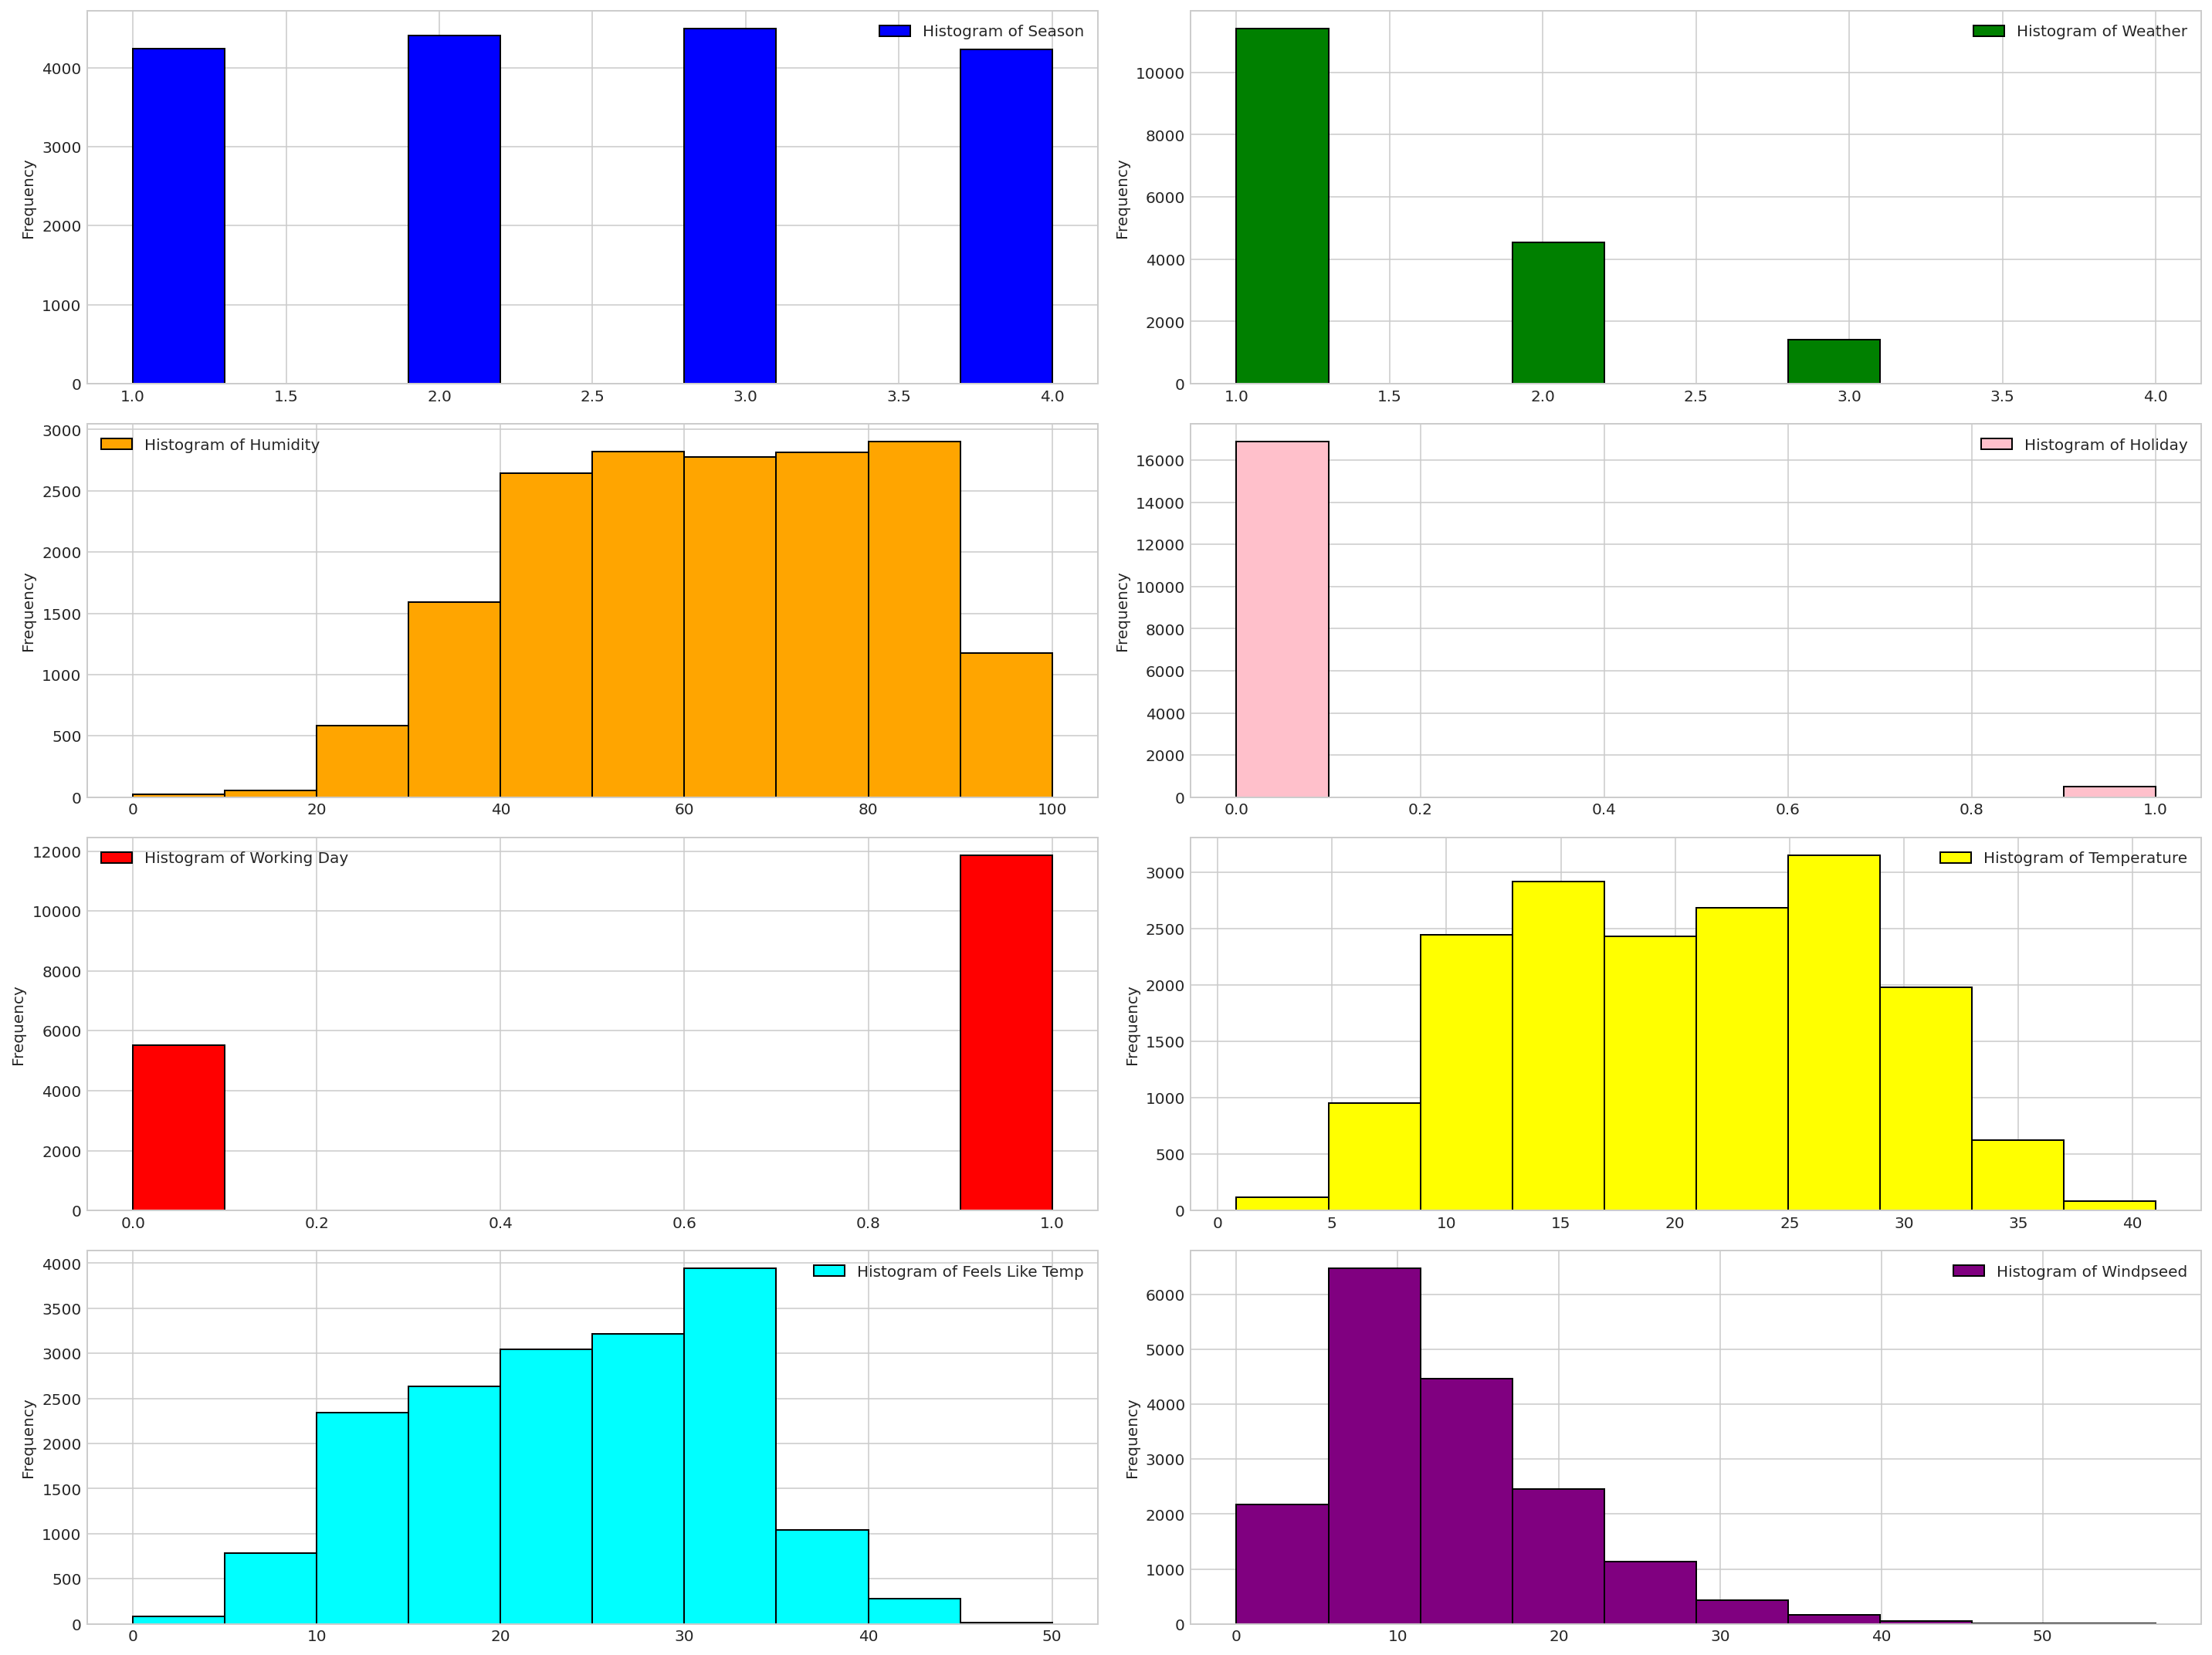

In [14]:
plt.figure(figsize=(20,15))
plt.subplot(421)
all_df['season'].plot.hist(bins=10, color='blue', label='Histogram of Season', edgecolor='black')
plt.legend(loc='best')
plt.subplot(422)
all_df['weather'].plot.hist(bins=10, color='green', label='Histogram of Weather', edgecolor='black')
plt.legend(loc='best')
plt.subplot(423)
all_df['humidity'].plot.hist(bins=10, color='orange', label='Histogram of Humidity', edgecolor='black')
plt.legend(loc='best')
plt.subplot(424)
all_df['holiday'].plot.hist(bins=10, color='pink', label='Histogram of Holiday', edgecolor='black')
plt.legend(loc='best')
plt.subplot(425)
all_df['workingday'].plot.hist(bins=10, color='red', label='Histogram of Working Day', edgecolor='black')
plt.legend(loc='best')
plt.subplot(426)
all_df['temp'].plot.hist(bins=10, color='yellow', label='Histogram of Temperature', edgecolor='black')
plt.legend(loc='best')
plt.subplot(427)
all_df['atemp'].plot.hist(bins=10, color='cyan', label='Histogram of Feels Like Temp', edgecolor='black')
plt.legend(loc='best')
plt.subplot(428)
all_df['windspeed'].plot.hist(bins=10, color='purple', label='Histogram of Windpseed', edgecolor='black')
plt.legend(loc='best')
plt.tight_layout();

In [15]:
# logarithmic transformation of dependent cols
# (adding 1 first so that 0 values don't become -inf)
for col in ['casual', 'registered', 'count']:
    all_df['%s_log' % col] = np.log(all_df[col] + 1)

In [16]:
all_df['date'] = dt.date
all_df['day'] = dt.day
all_df['month'] = dt.month
all_df['year'] = dt.year
all_df['hour'] = dt.hour
all_df['dow'] = dt.dayofweek
all_df['woy'] = dt.weekofyear

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  import sys


In [17]:
# How many columns have null values
all_df.isnull().sum()

datetime          0
season            0
holiday           0
workingday        0
weather           0
temp              0
atemp             0
humidity          0
windspeed         0
casual            0
registered        0
count             0
data_set          0
casual_log        0
registered_log    0
count_log         0
date              0
day               0
month             0
year              0
hour              0
dow               0
woy               0
dtype: int64

In [18]:
# interpolate weather, temp, atemp, humidity, windspeed
all_df["weather"] = all_df["weather"].interpolate(method='time').apply(np.round)
all_df["temp"] = all_df["temp"].interpolate(method='time')
all_df["atemp"] = all_df["atemp"].interpolate(method='time')
all_df["humidity"] = all_df["humidity"].interpolate(method='time').apply(np.round)
all_df["windspeed"] = all_df["windspeed"].interpolate(method='time')

In [19]:
# add a count_season column using join
by_season = all_df[all_df['data_set'] == 'train'].copy().groupby(['season'])[['count']].agg(sum)
by_season.columns = ['count_season']
all_df = all_df.join(by_season, on='season')

In [20]:
print(by_season)

        count_season
season              
1             312498
2             588282
3             640662
4             544034


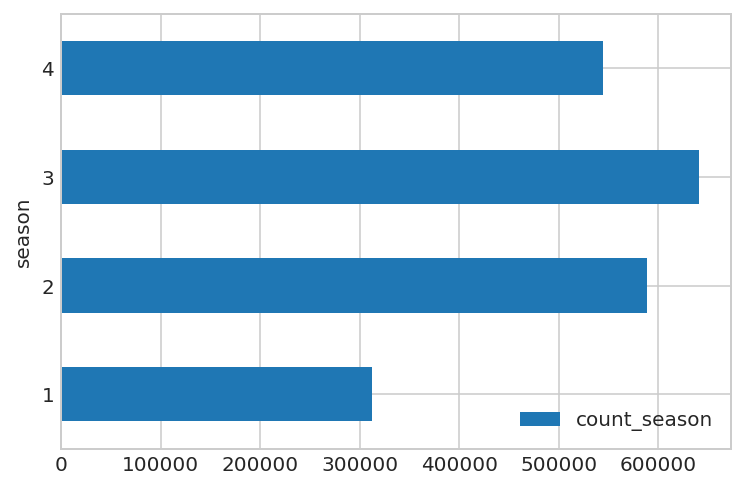

In [21]:
by_season.plot(kind='barh')
plt.grid(True)
plt.show();

In [22]:
def get_day(day_start):
    day_end = day_start + pd.offsets.DateOffset(hours=23)
    return pd.date_range(day_start, day_end, freq="H")

# tax day
all_df.loc[get_day(pd.datetime(2011, 4, 15)), "workingday"] = 1
all_df.loc[get_day(pd.datetime(2012, 4, 16)), "workingday"] = 1

# thanksgiving friday
all_df.loc[get_day(pd.datetime(2011, 11, 25)), "workingday"] = 0
all_df.loc[get_day(pd.datetime(2012, 11, 23)), "workingday"] = 0

# tax day
all_df.loc[get_day(pd.datetime(2011, 4, 15)), "holiday"] = 0
all_df.loc[get_day(pd.datetime(2012, 4, 16)), "holiday"] = 0

# thanksgiving friday
all_df.loc[get_day(pd.datetime(2011, 11, 25)), "holiday"] = 1
all_df.loc[get_day(pd.datetime(2012, 11, 23)), "holiday"] = 1

#storms
all_df.loc[get_day(pd.datetime(2012, 5, 21)), "holiday"] = 1

#tornado
all_df.loc[get_day(pd.datetime(2012, 6, 1)), "holiday"] = 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-pack

In [23]:
by_hour = all_df[all_df['data_set'] == 'train'].copy().groupby(['hour', 'workingday'])['count'].agg('sum').unstack()
by_hour.head(10)

workingday,0,1
hour,,
0,13633,11455
1,10384,4988
2,7654,2605
3,3666,1425
4,1230,1602
5,1280,7655
6,2719,31979
7,6318,90650
8,15380,149680


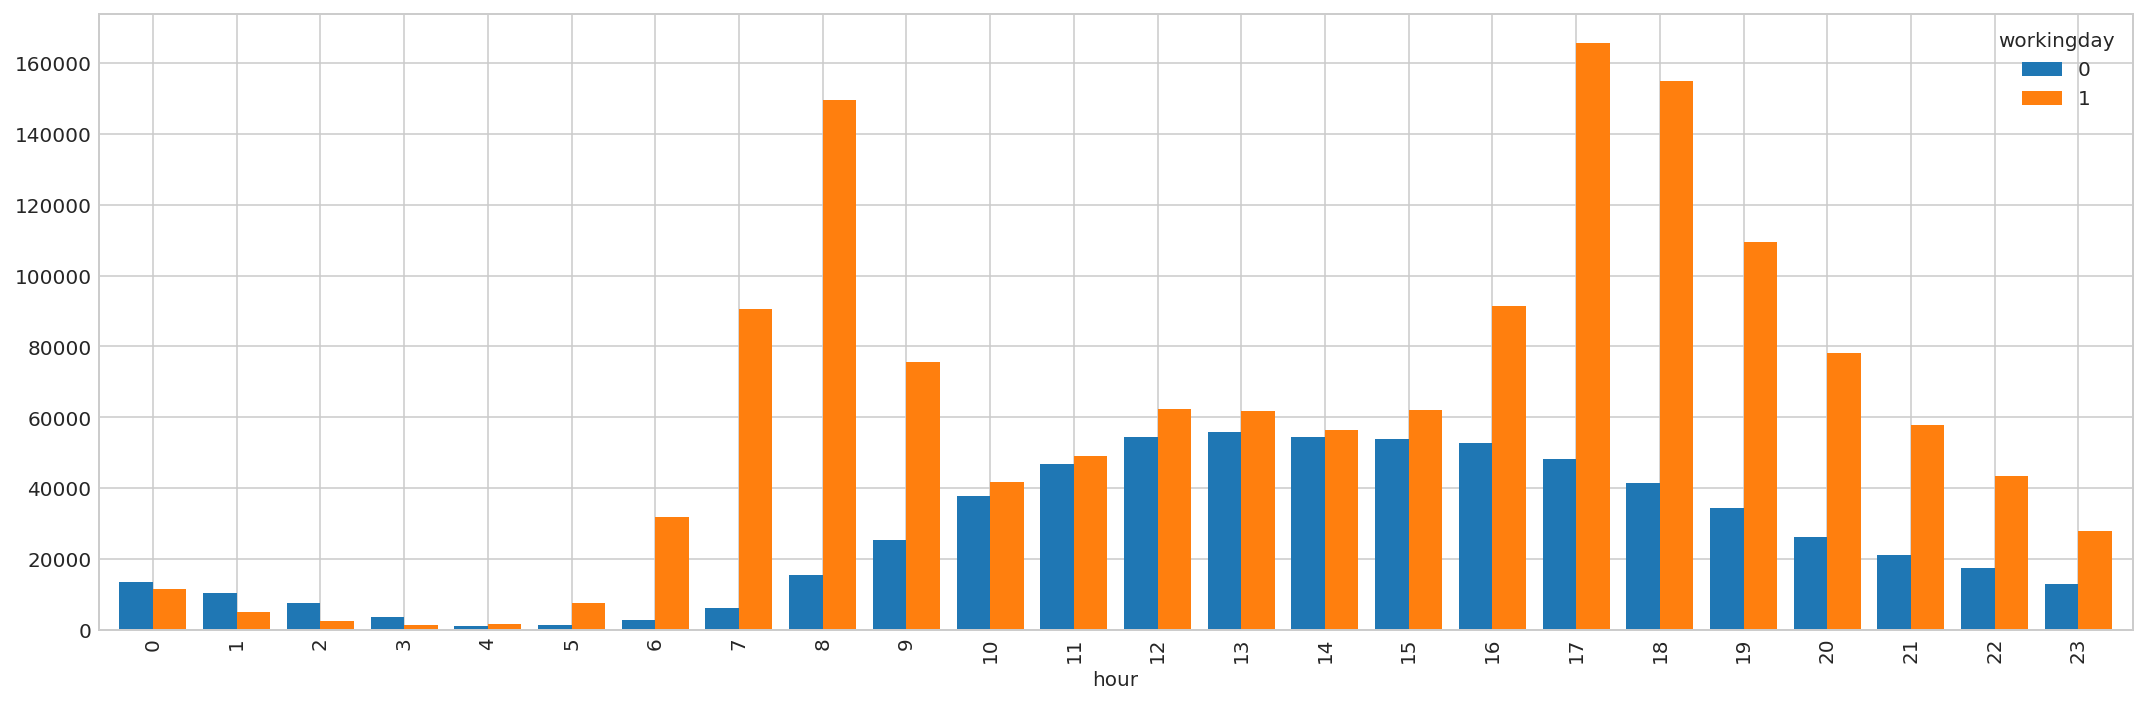

In [24]:
# rentals by hour, split by working day (or not)
by_hour.plot(kind='bar', figsize=(15,5), width=0.8);
plt.grid(True)
plt.tight_layout();

In [25]:
train_df = all_df[all_df['data_set'] == 'train'].copy()

In [26]:
#train_df.boxplot(column='count', by='hour', figsize=(15,5))
#plt.ylabel('Count of Users')
#plt.title("Boxplot of Count grouped by hour")
#plt.suptitle("") # get rid of the pandas autogenerated title

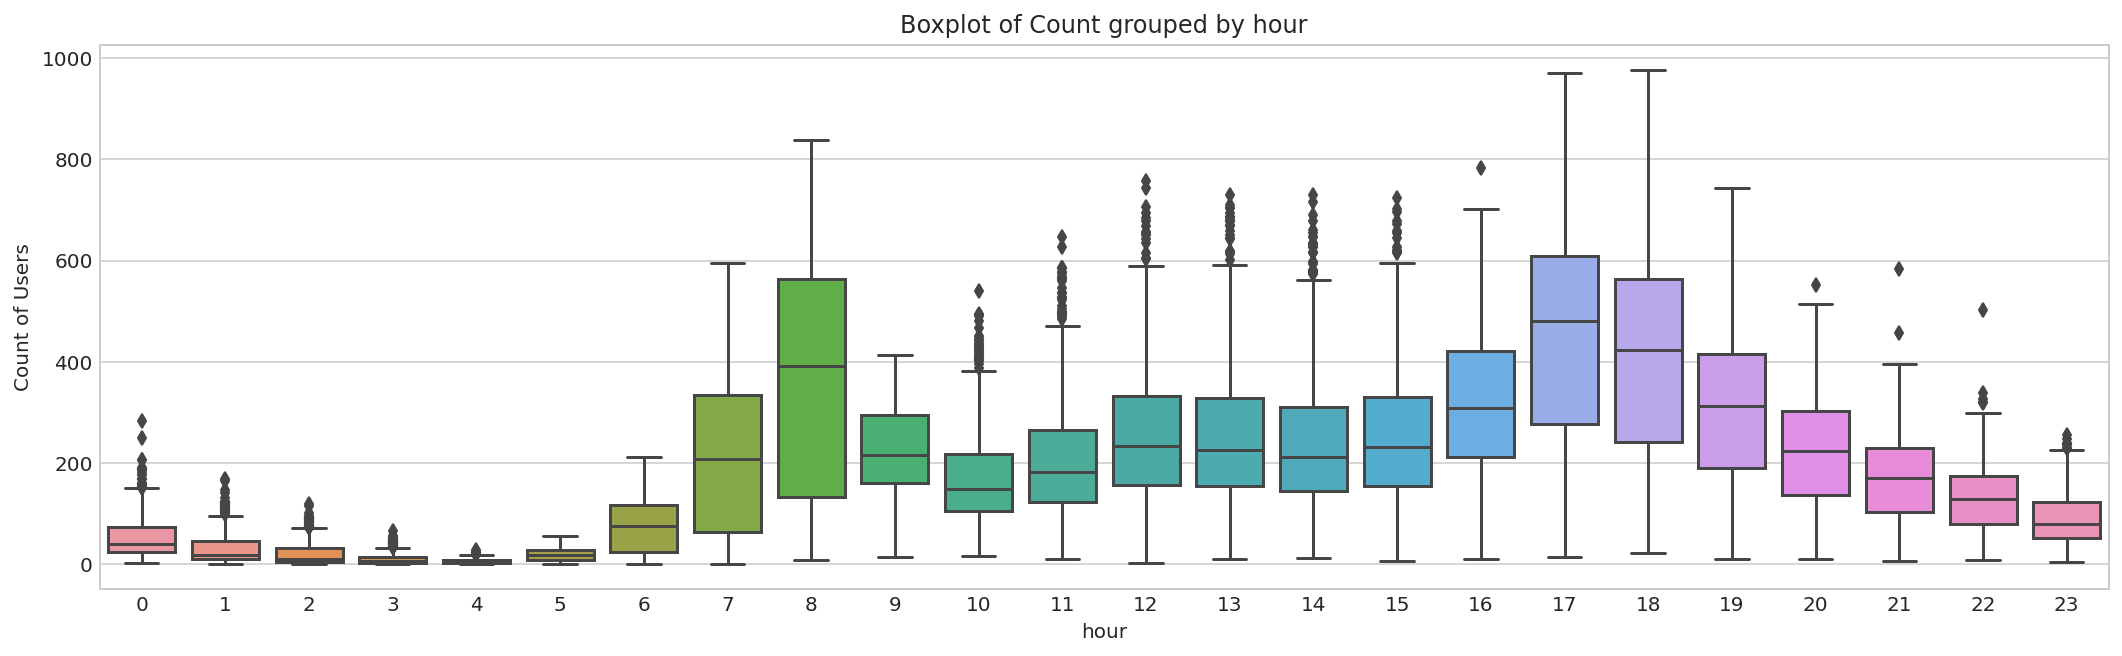

In [27]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x=train_df['hour'], y=train_df['count'], ax=ax)
ax.set_ylabel('Count of Users')
ax.set_title("Boxplot of Count grouped by hour");
#plt.suptitle("") # get rid of the pandas autogenerated title

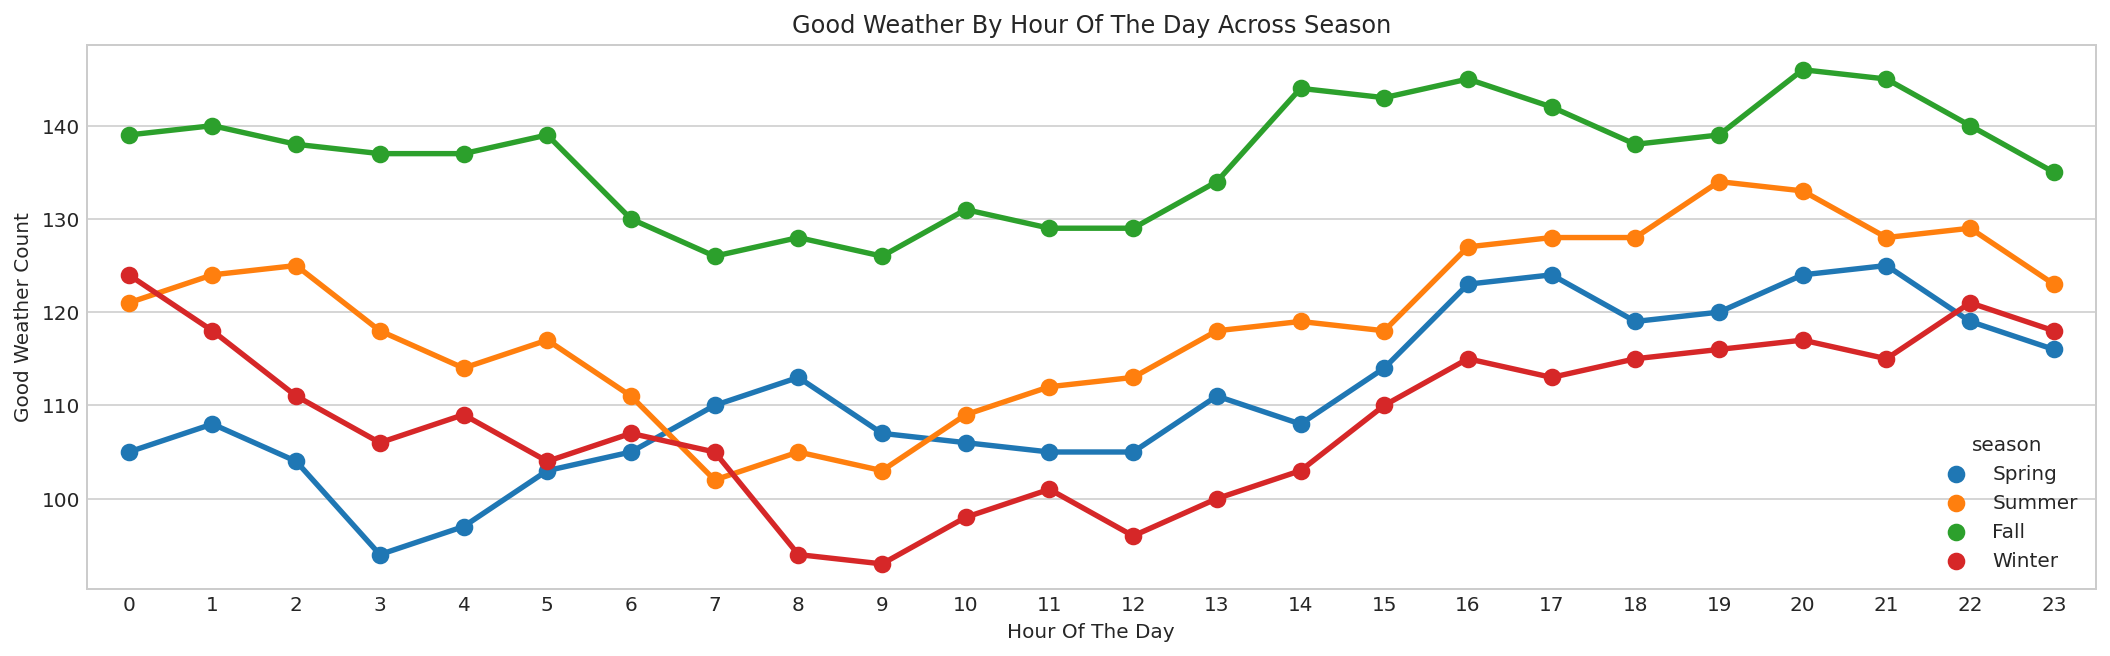

In [28]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
good_weather = all_df[all_df['weather'] == 1][['hour', 'season']].copy()
data = pd.DataFrame({'count' : good_weather.groupby(["hour","season"]).size()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])

fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Good Weather Count', title="Good Weather By Hour Of The Day Across Season");

In [29]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
normal_weather = all_df[all_df['weather'] == 3][['hour', 'season']].copy()
data = pd.DataFrame({'count' : normal_weather.groupby(["hour","season"]).size()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])

In [30]:
data.sample(n=5)

,hour,season,count
7,1,Winter,12
76,19,Spring,16
41,10,Summer,12
84,21,Spring,16
24,6,Spring,14


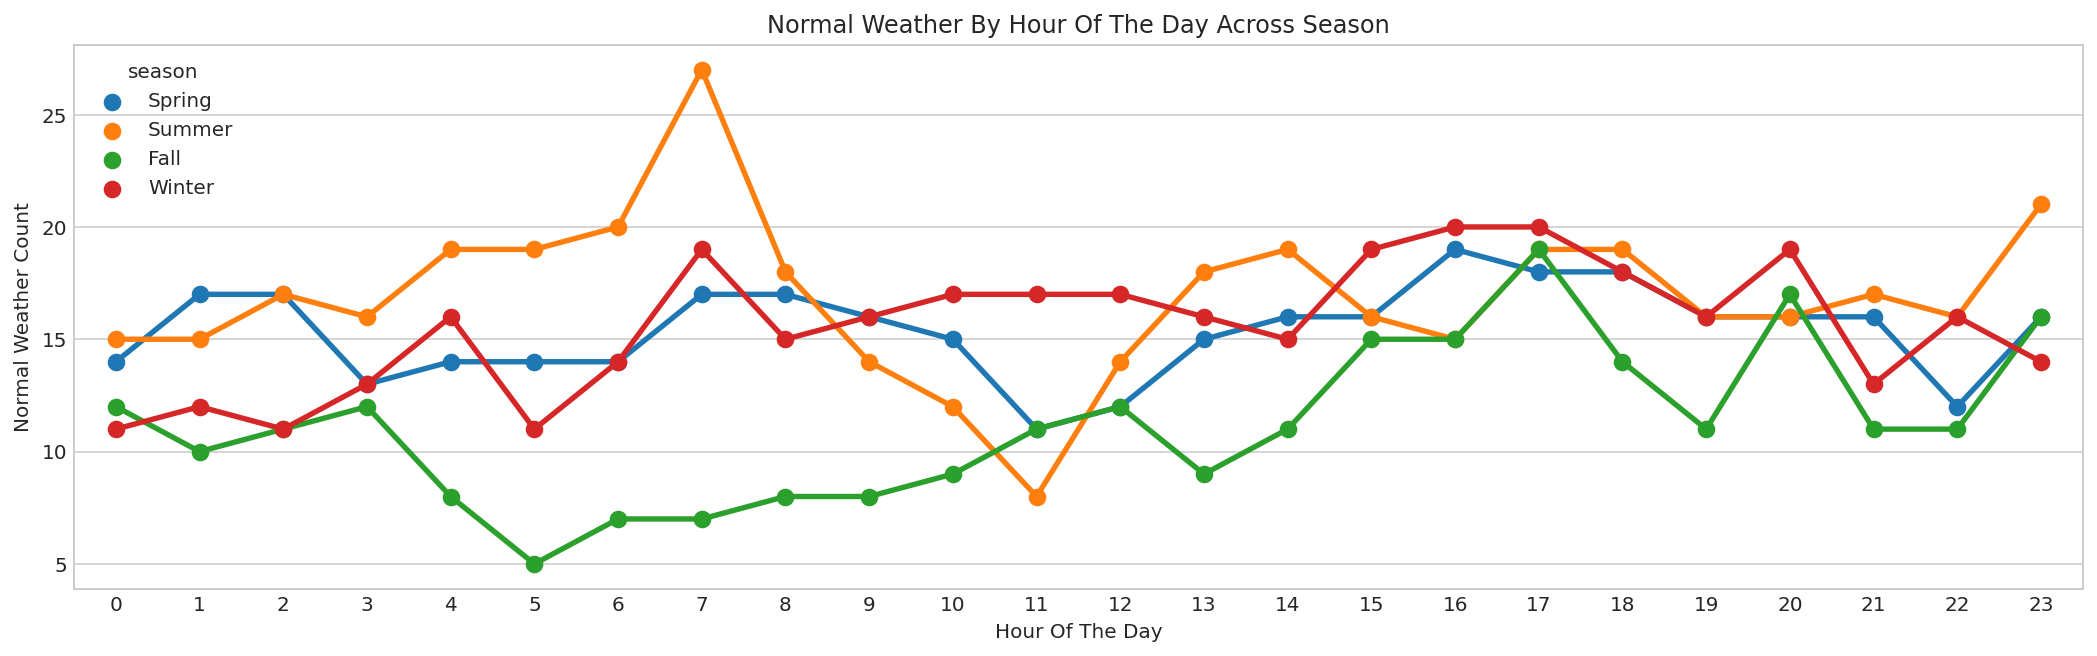

In [31]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Normal Weather Count', title="Normal Weather By Hour Of The Day Across Season");

In [32]:
data = pd.pivot_table(data, values='count', columns='season', index='hour')
data.sample(5)

season,Fall,Spring,Summer,Winter
hour,,,,
22,11,12,16,16
14,11,16,19,15
9,8,16,14,16
20,17,16,16,19
16,15,19,15,20


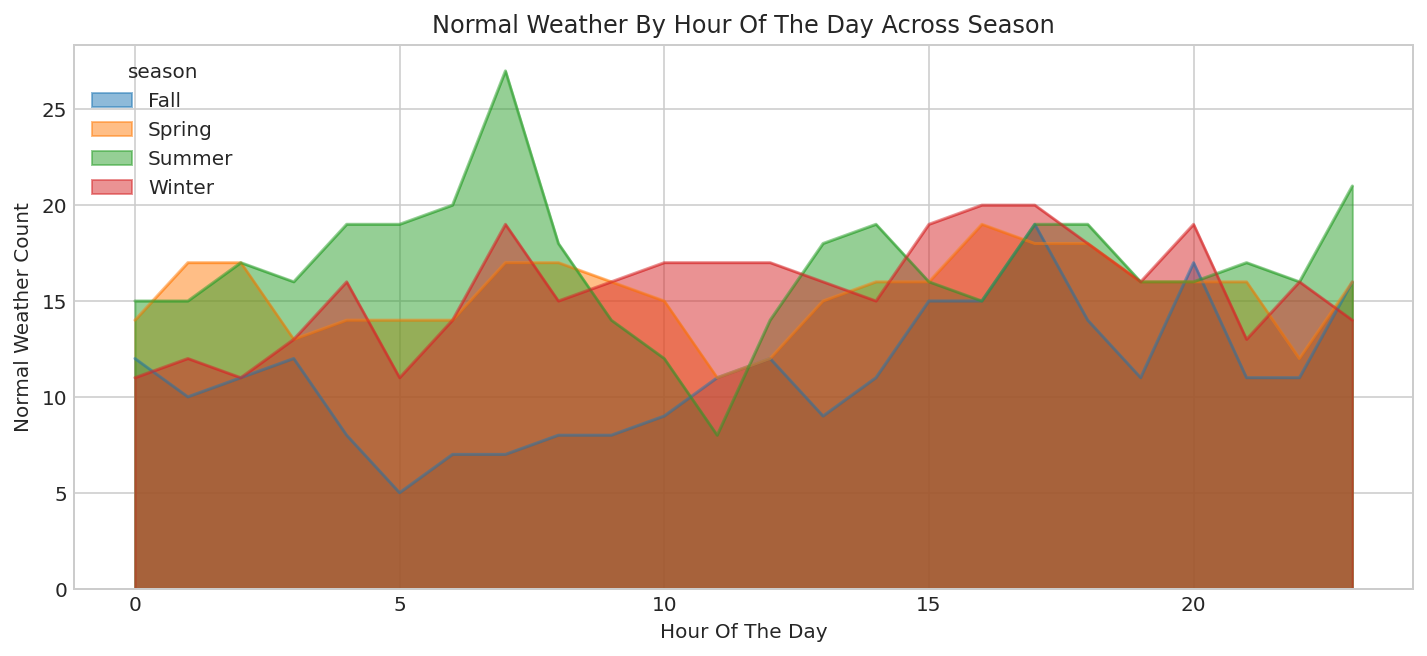

In [33]:
fig, ax = plt.subplots(figsize=(12, 5))
data.plot.area(stacked=False, ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Normal Weather Count', title="Normal Weather By Hour Of The Day Across Season");

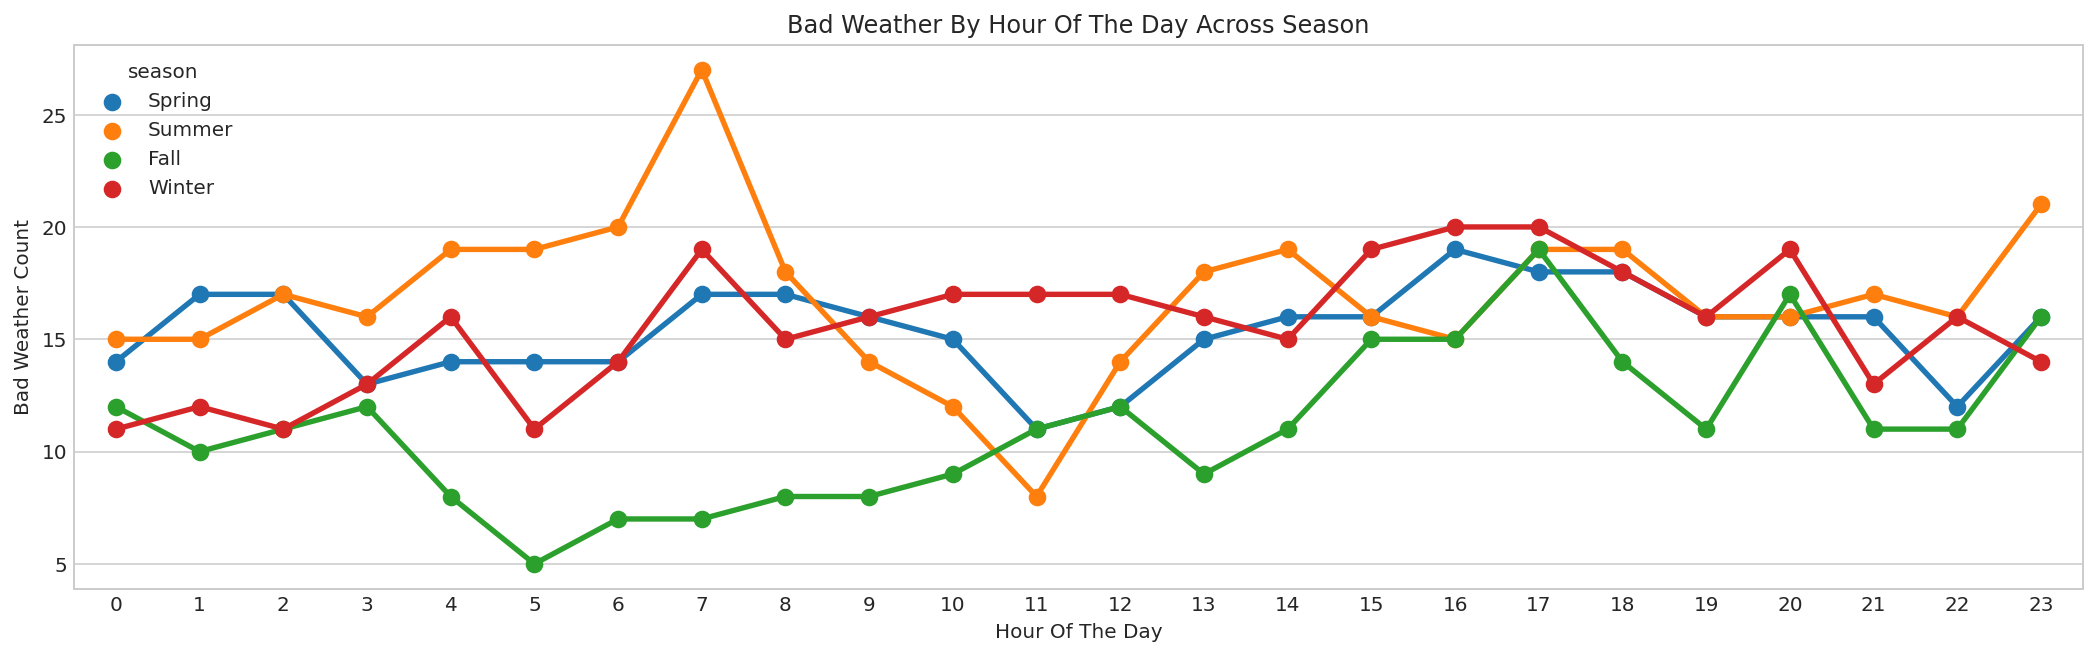

In [34]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
bad_weather = all_df[all_df['weather'] == 3][['hour', 'season']].copy()
data = pd.DataFrame({'count' : bad_weather.groupby(["hour","season"]).size()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])

fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Bad Weather Count', title="Bad Weather By Hour Of The Day Across Season");

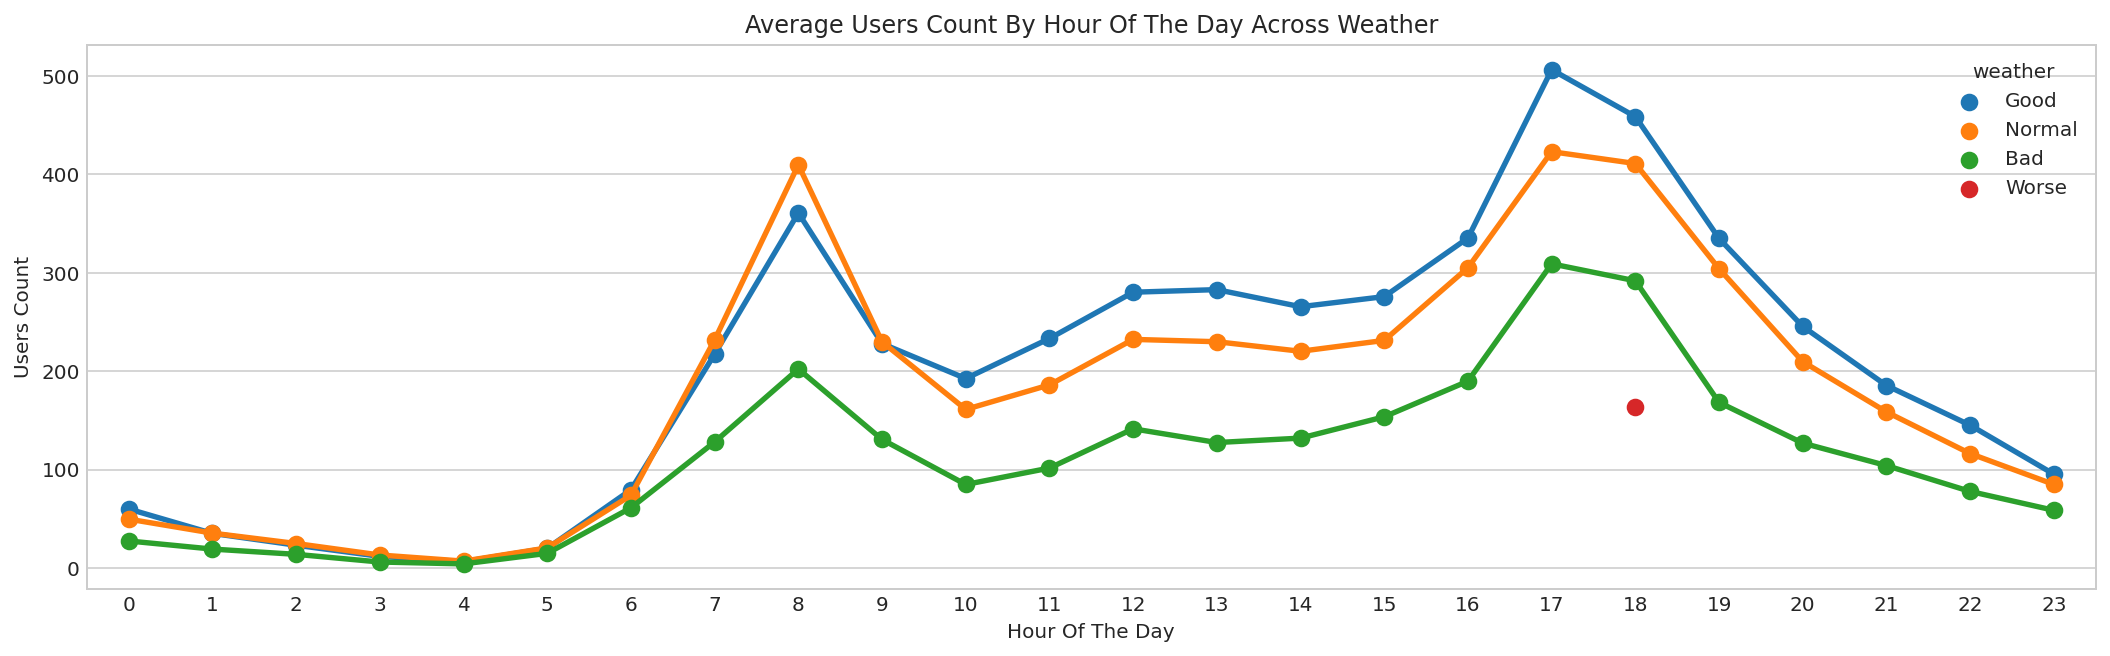

In [35]:
weather_map = {1:'Good', 2:'Normal', 3:'Bad', 4:'Worse'}
data = pd.DataFrame(train_df.groupby(["hour","weather"], sort=True)["count"].mean()).reset_index()
data['weather'] = data['weather'].map(lambda d : weather_map[d])
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["weather"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Weather");

In [36]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
data = pd.DataFrame({'mean':train_df.groupby(["hour","season"], sort=True)["count"].mean()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])

In [37]:
data.sample(n=5)

,hour,season,mean
53,13,Summer,289.991228
14,3,Fall,15.778761
16,4,Spring,3.336634
80,20,Spring,124.394737
43,10,Winter,186.298246


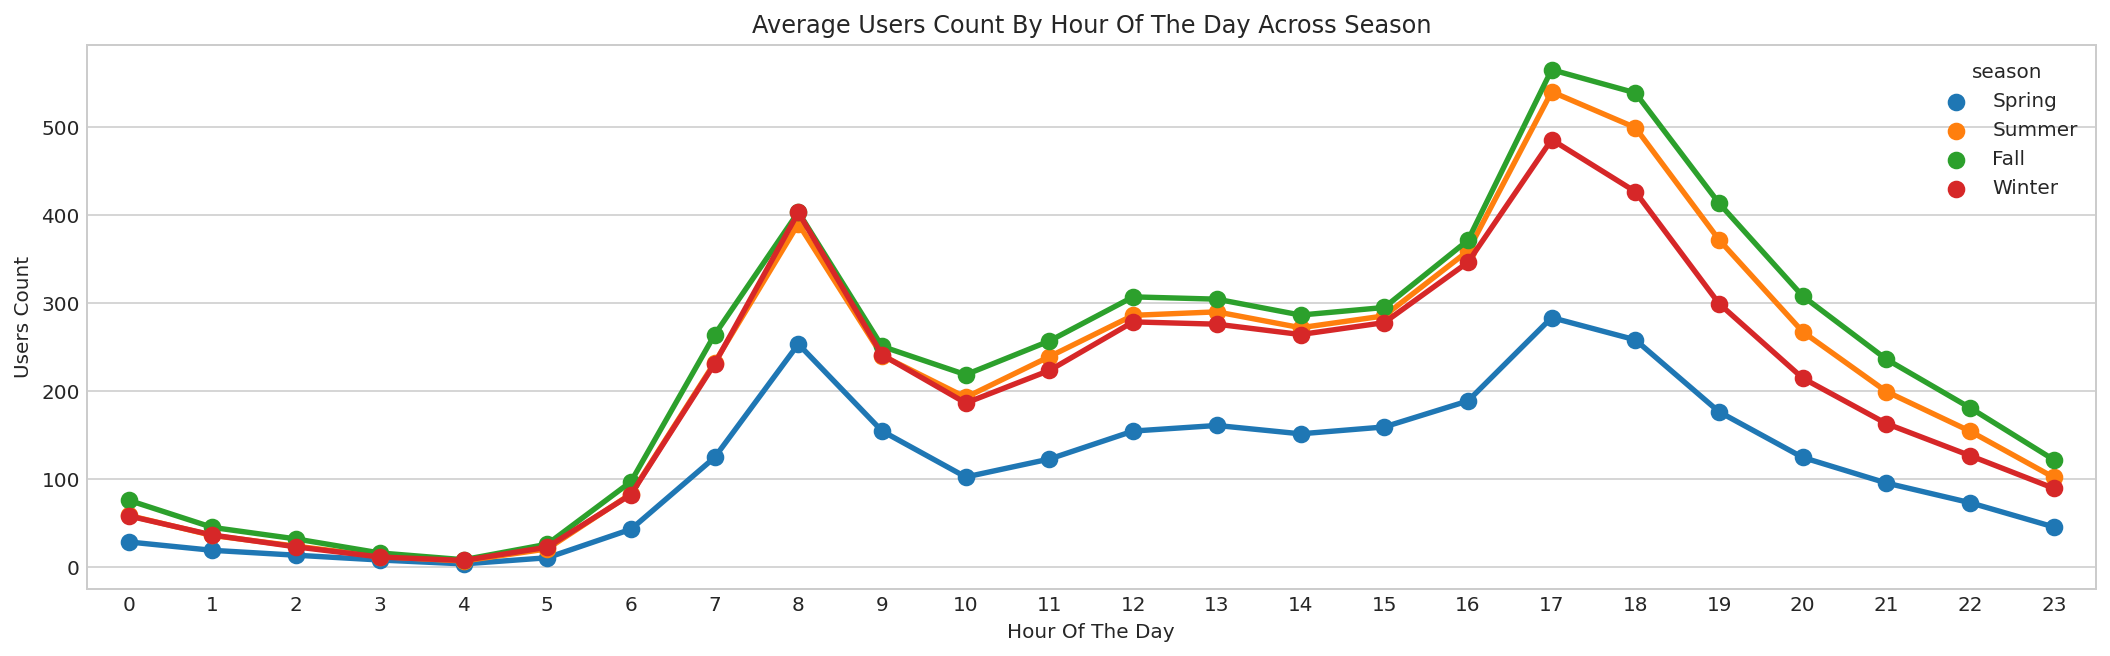

In [38]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["mean"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Season");

In [39]:
day_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
hueOrder = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
data = pd.DataFrame({'mean':train_df.groupby(["hour","dow"], sort=True)["count"].mean()}).reset_index()
data['dow'] = data['dow'].map(lambda d : day_map[d])

In [40]:
data.sample(n=5)

,hour,dow,mean
12,1,Saturday,70.015152
49,7,Monday,260.400000
166,23,Saturday,120.030303
129,18,Thursday,506.815385
41,5,Sunday,9.476190


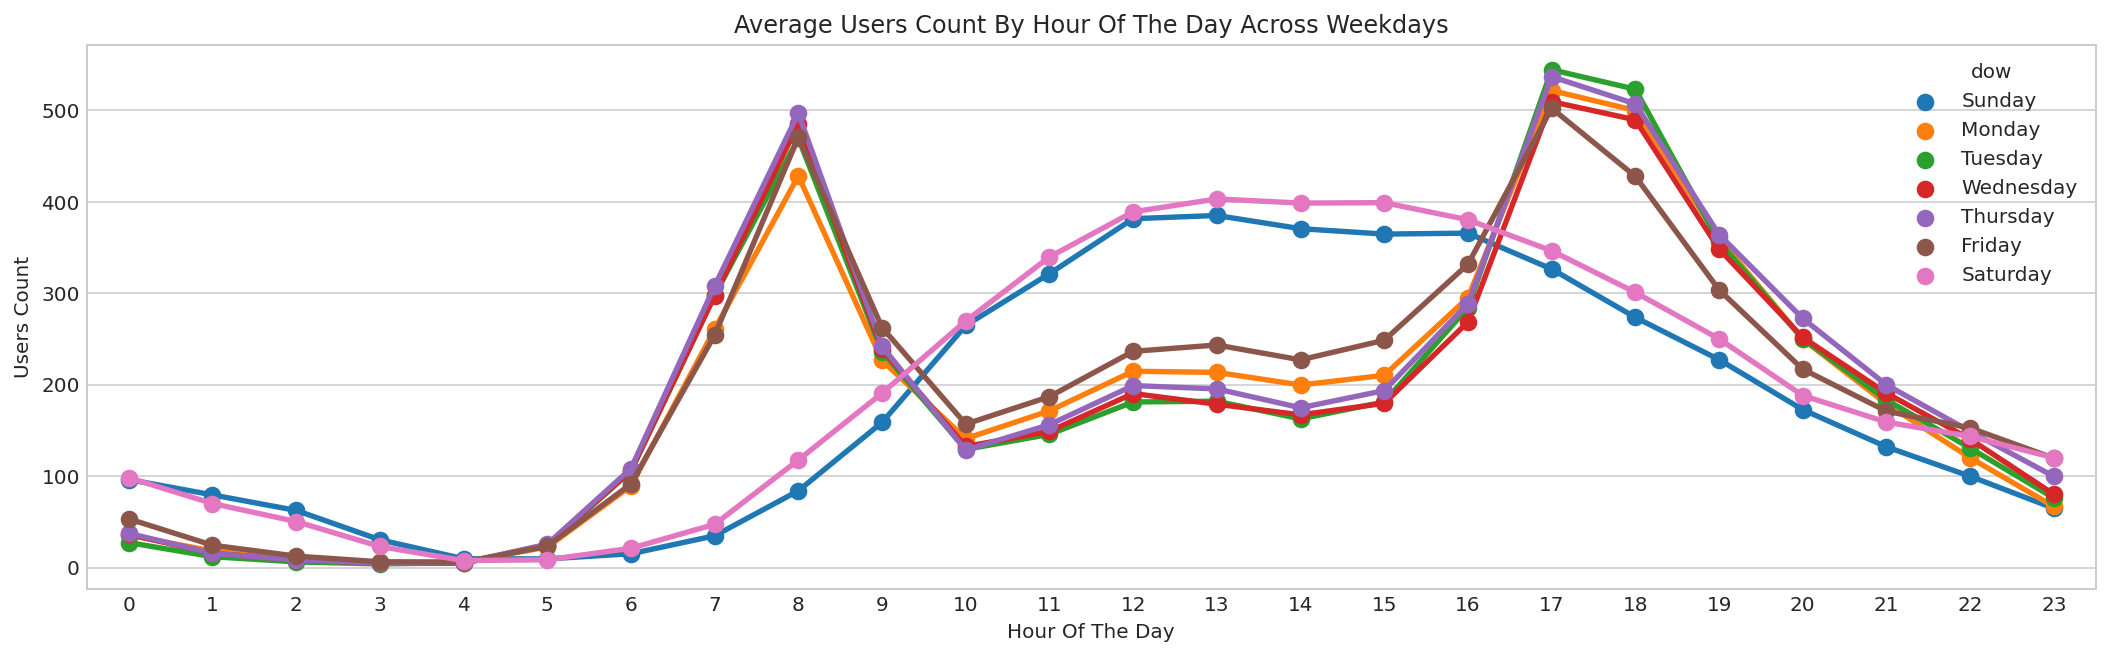

In [41]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["mean"], hue=data["dow"], hue_order=hueOrder, ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Weekdays");

In [42]:
#fig, axs = plt.subplots(1, 2, figsize=(15,5), sharex=False, sharey=False)

#train_df.boxplot(column='casual', by='hour', ax=axs[0])
#axs[0].set_ylabel('casual users')
#axs[0].set_title('')

#train_df.boxplot(column='registered', by='hour', ax=axs[1])
#axs[1].set_ylabel('registered users')
#axs[1].set_title('')

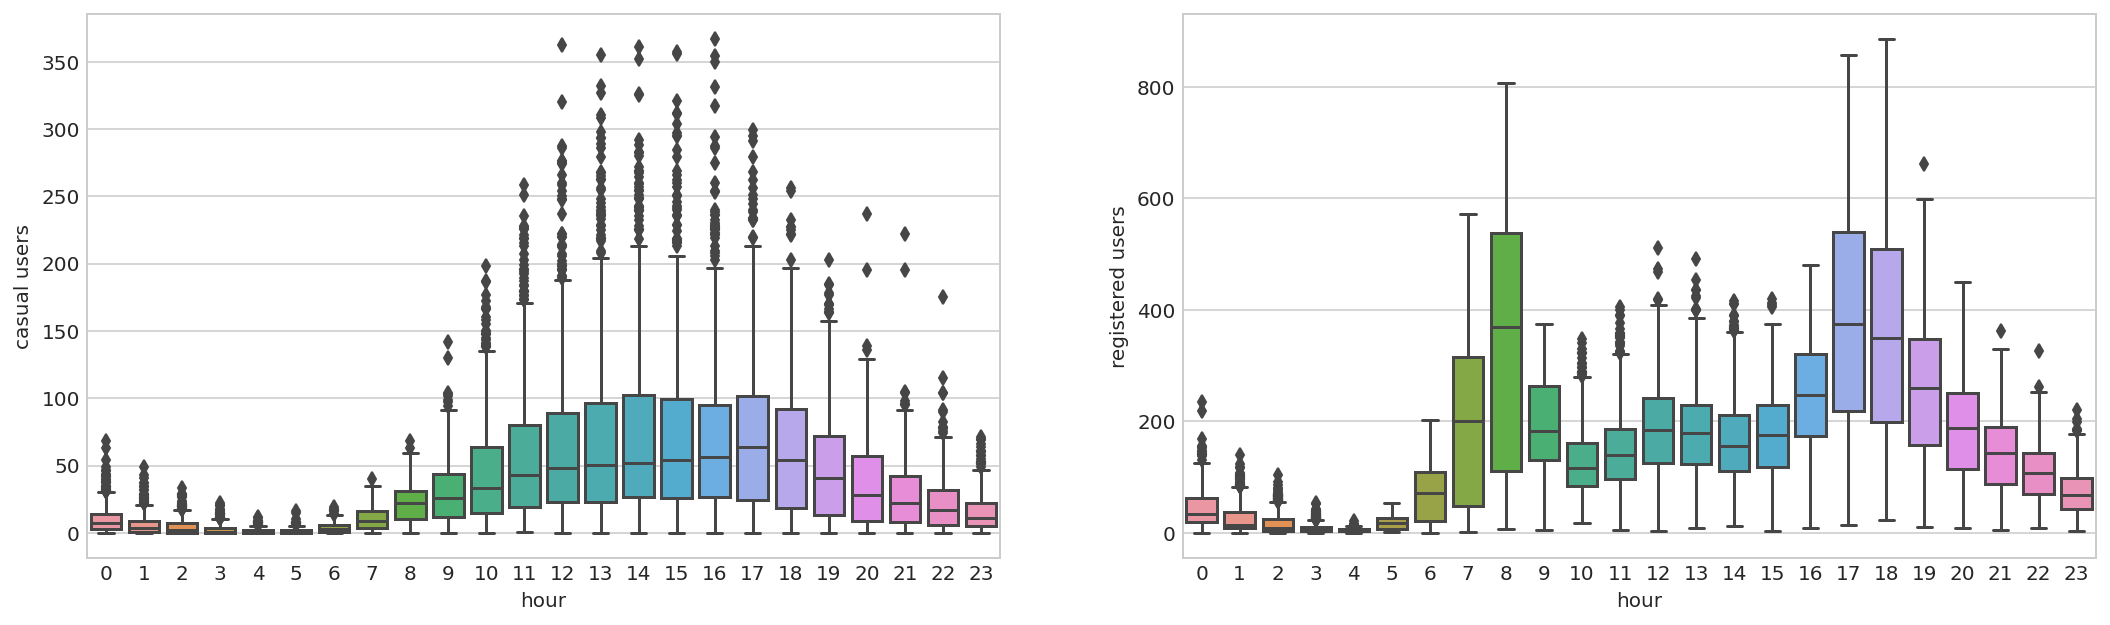

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(18,5), sharex=False, sharey=False)

sns.boxplot(x='hour', y='casual', data=train_df, ax=axs[0])
axs[0].set_ylabel('casual users')
axs[0].set_title('')

sns.boxplot(x='hour', y='registered', data=train_df, ax=axs[1])
axs[1].set_ylabel('registered users')
axs[1].set_title('');

In [44]:
train_df[["hour","casual","registered"]].head(5)

,hour,casual,registered
datetime,,,
2011-01-01 00:00:00,0,3,13
2011-01-01 01:00:00,1,8,32
2011-01-01 02:00:00,2,5,27
2011-01-01 03:00:00,3,3,10
2011-01-01 04:00:00,4,0,1


In [45]:
pd.melt(train_df[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'], var_name='usertype', value_name='count').head(5)

,hour,usertype,count
0,0,casual,3
1,1,casual,8
2,2,casual,5
3,3,casual,3
4,4,casual,0


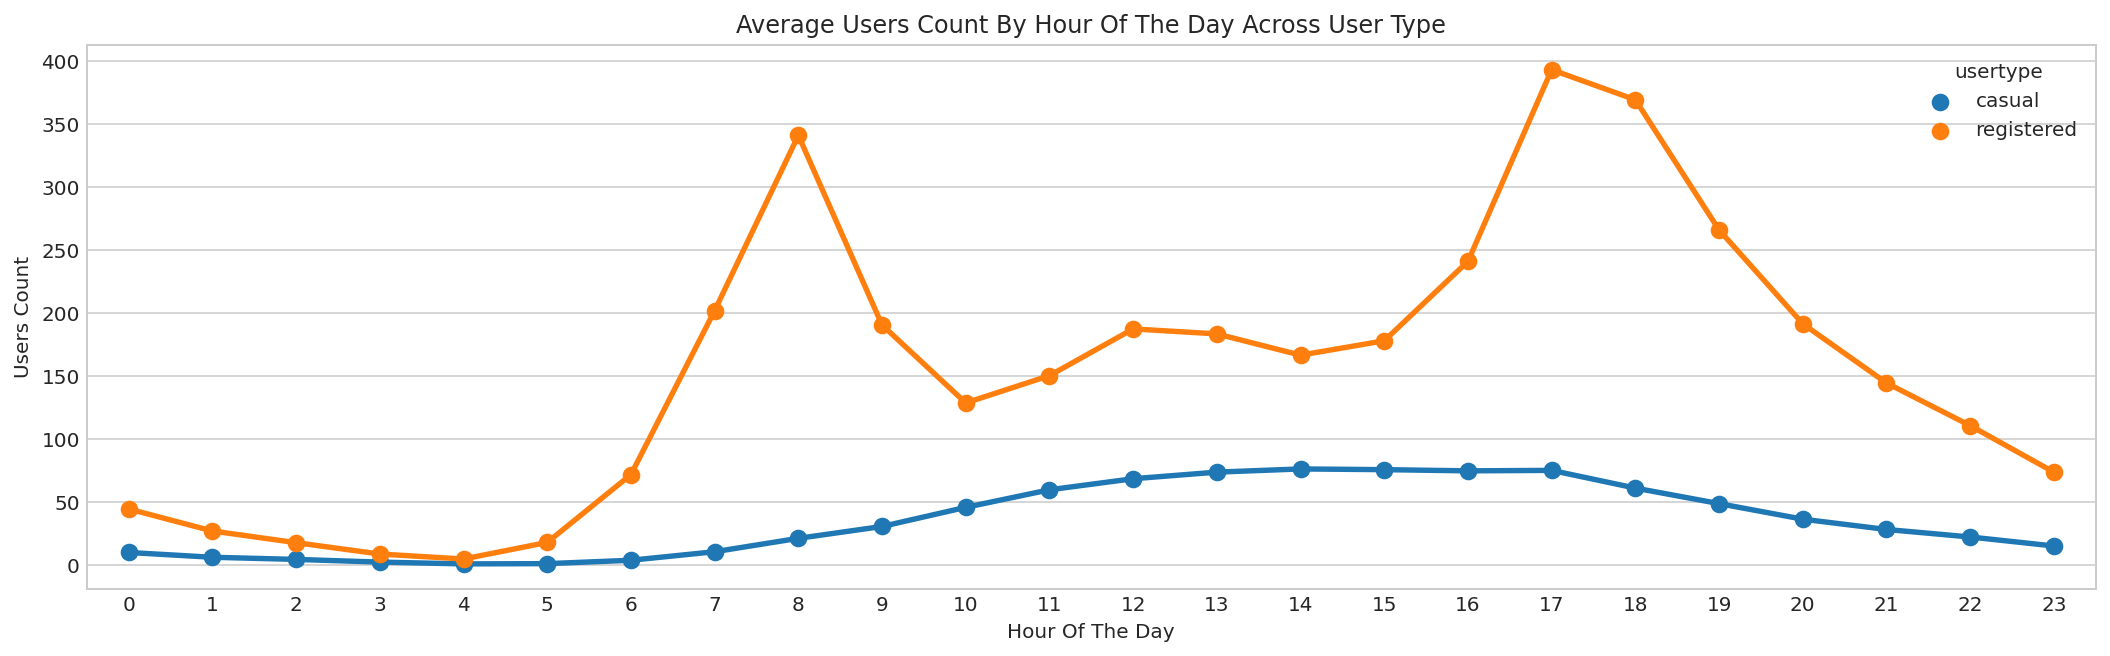

In [46]:
fig, ax = plt.subplots(figsize=(18, 5))
train_df_melt = pd.melt(train_df[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'], var_name='usertype', value_name='count')
data = pd.DataFrame(train_df_melt.groupby(["hour", "usertype"], sort=True)["count"].mean()).reset_index()
sns.pointplot(x=data["hour"], y=data["count"], hue=data["usertype"], hue_order=["casual","registered"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title='Average Users Count By Hour Of The Day Across User Type');

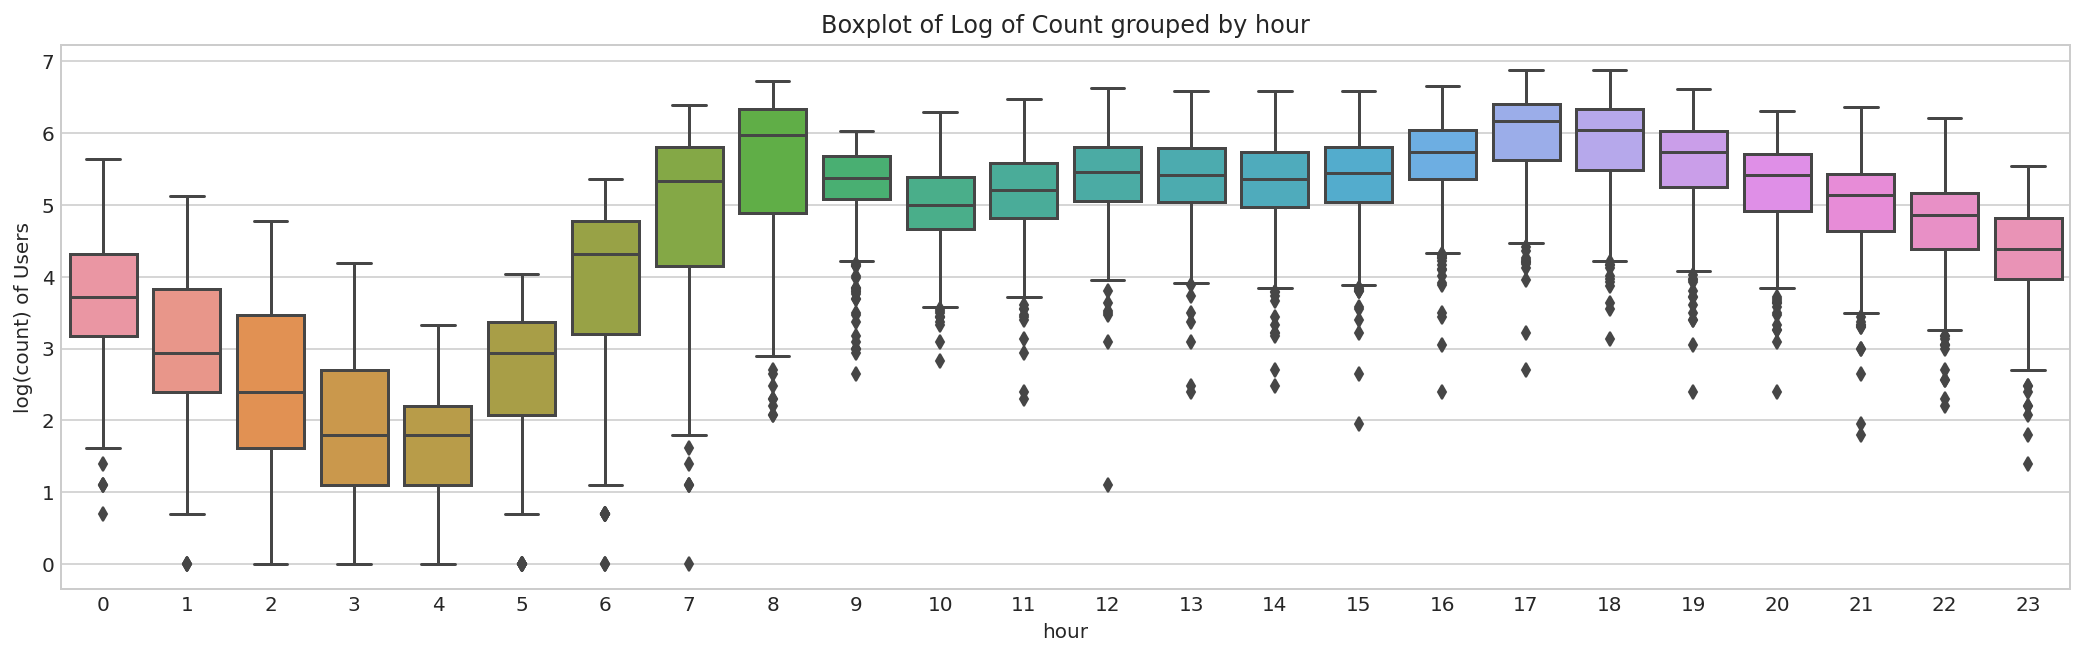

In [47]:
train_df = train_df.assign(log_count = lambda df : np.log(train_df['count']))

fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='hour', y='log_count', data=train_df, ax=ax)
ax.set(ylabel='log(count) of Users',title='Boxplot of Log of Count grouped by hour')

#plt.suptitle("") # get rid of the pandas autogenerated title
train_df.drop(['log_count'], axis = 1, inplace=True);

In [48]:
def hour_jitter(h):
    #return h + ((np.random.randint(low=0, high=9, size=1)[0] - 4) / 10)
    return h + np.random.uniform(-0.4, 0.4)

In [49]:
def hour_format(h):
    return "{:02d}:00 AM".format(h) if h <= 12 else "{:02d}:00 PM".format(h%12)

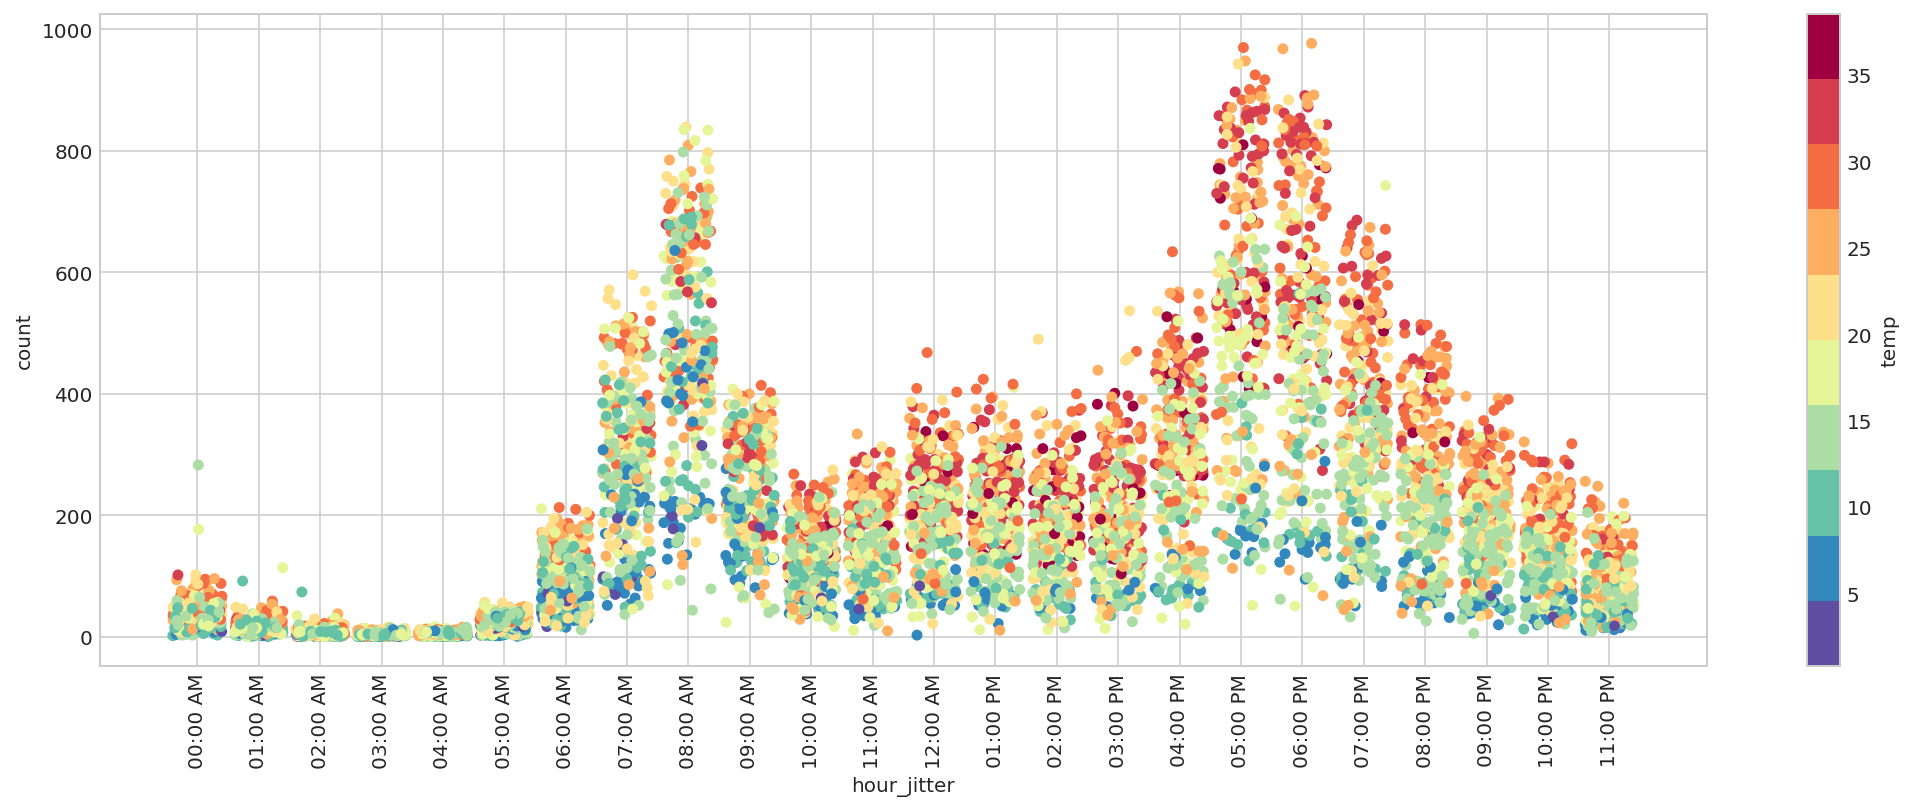

In [50]:
# jitter plot
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# color_map = plt.get_cmap("jet")
color_map = mcolors.ListedColormap(list(["#5e4fa2", "#3288bd", "#66c2a5", "#abdda4", "#e6f598", "#fee08b", "#fdae61", "#f46d43", "#d53e4f", "#9e0142"]))
train_df['hour_jitter'] = train_df['hour'].map(hour_jitter)
train_df[train_df['workingday'] == 1].plot(kind="scatter", x='hour_jitter', y='count',
    figsize=(18,6),
    c='temp', cmap=color_map, colorbar=True,
    sharex=False)

hours = np.unique(train_df['hour'].values)
hour_labels = [hour_format(h) for h in hours]
plt.xticks(hours, hour_labels, rotation='vertical');

In [51]:
train_df.drop('hour_jitter', axis=1, inplace=True);

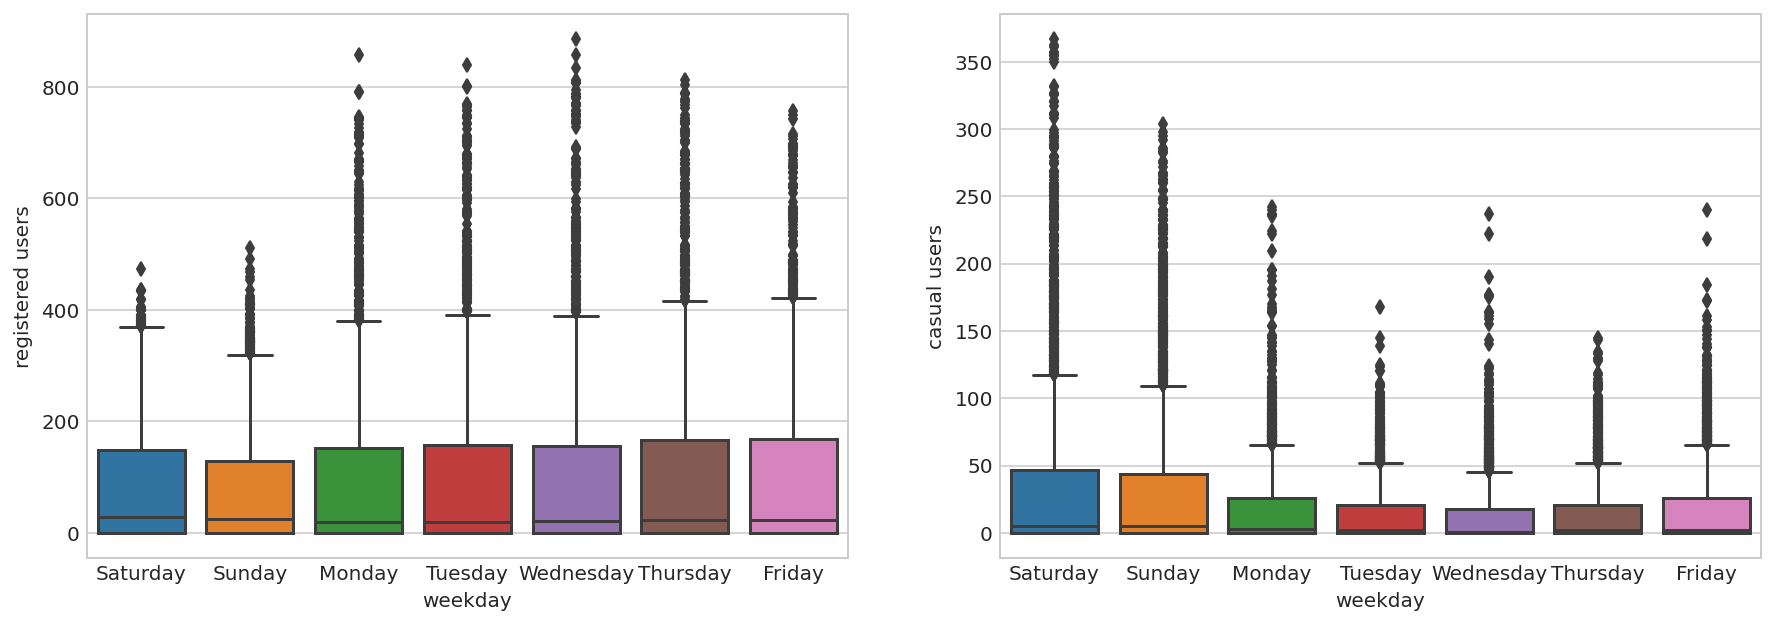

In [52]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
all_df['weekday'] = all_df['dow'].map(dayOfWeek)

fig, axs = plt.subplots(1, 2, figsize=(15,5), sharex=False, sharey=False)

sns.boxplot(x='weekday', y='registered', data=all_df, ax=axs[0])
axs[0].set_ylabel('registered users')
axs[0].set_title('')

sns.boxplot(x='weekday', y='casual', data=all_df, ax=axs[1])
axs[1].set_ylabel('casual users')
axs[1].set_title('')

all_df.drop('weekday', axis=1, inplace=True);

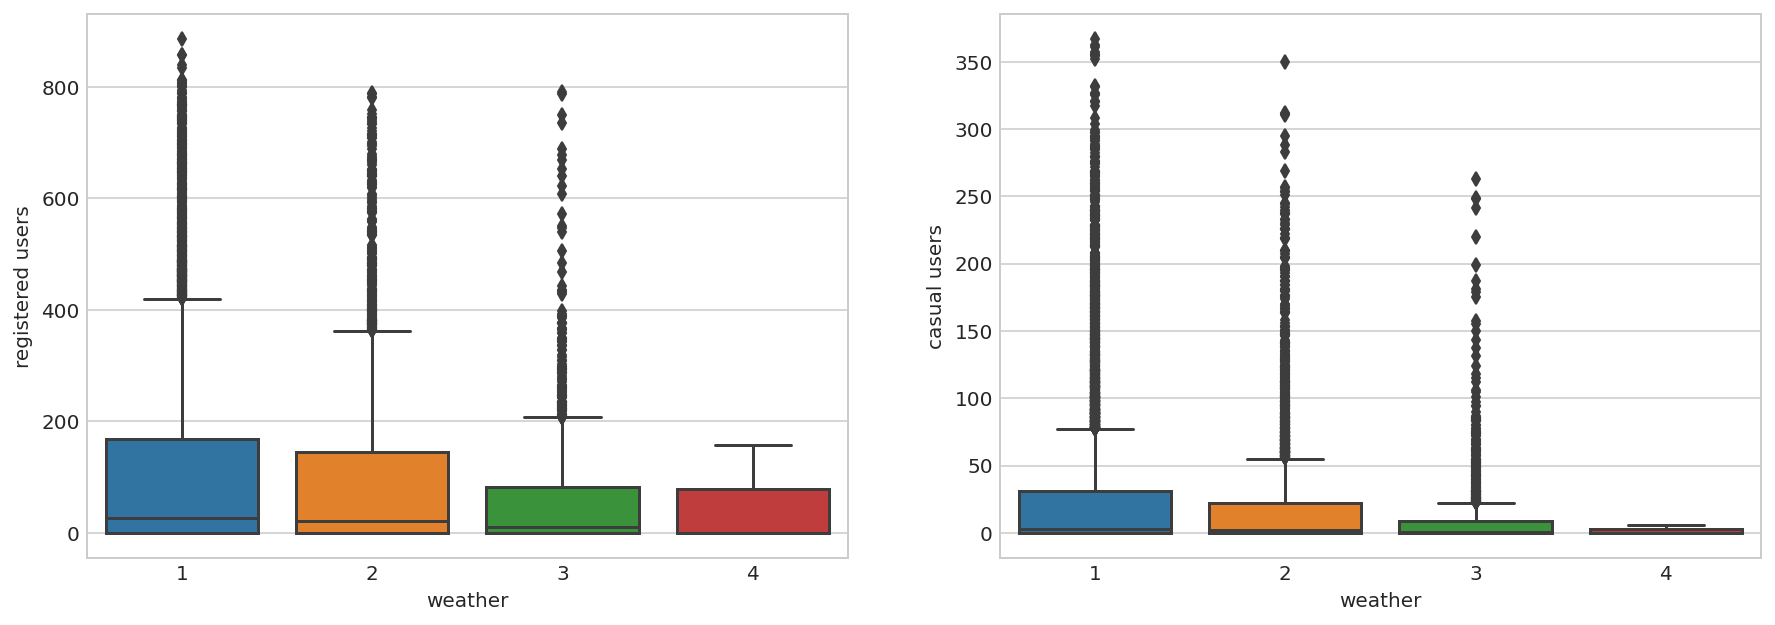

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(15,5), sharex=False, sharey=False)

sns.boxplot(x='weather', y='registered', data=all_df, ax=axs[0])
axs[0].set_ylabel('registered users')
axs[0].set_title('')

sns.boxplot(x='weather', y='casual', data=all_df, ax=axs[1])
axs[1].set_ylabel('casual users')
axs[1].set_title('');

In [54]:
sub_df = train_df[['count', 'registered', 'casual', 'temp', 'atemp', 'humidity', 'windspeed', 'workingday', 'holiday']]

In [55]:
sub_df.corr()

,count,registered,casual,temp,atemp,humidity,windspeed,workingday,holiday
count,1.000000,0.970948,0.690414,0.394454,0.389784,-0.317371,0.101369,0.011965,-0.008049
registered,0.970948,1.000000,0.497250,0.318571,0.314635,-0.265458,0.091052,0.120154,-0.023038
casual,0.690414,0.497250,1.000000,0.467097,0.462067,-0.348187,0.092276,-0.319864,0.040464
temp,0.394454,0.318571,0.467097,1.000000,0.984948,-0.064949,-0.017852,0.033174,0.002969
atemp,0.389784,0.314635,0.462067,0.984948,1.000000,-0.043536,-0.057473,0.027851,-0.003455
humidity,-0.317371,-0.265458,-0.348187,-0.064949,-0.043536,1.000000,-0.318607,-0.011039,0.012114
windspeed,0.101369,0.091052,0.092276,-0.017852,-0.057473,-0.318607,1.000000,0.018454,-0.000585
workingday,0.011965,0.120154,-0.319864,0.033174,0.027851,-0.011039,0.018454,1.000000,-0.213189
holiday,-0.008049,-0.023038,0.040464,0.002969,-0.003455,0.012114,-0.000585,-0.213189,1.000000


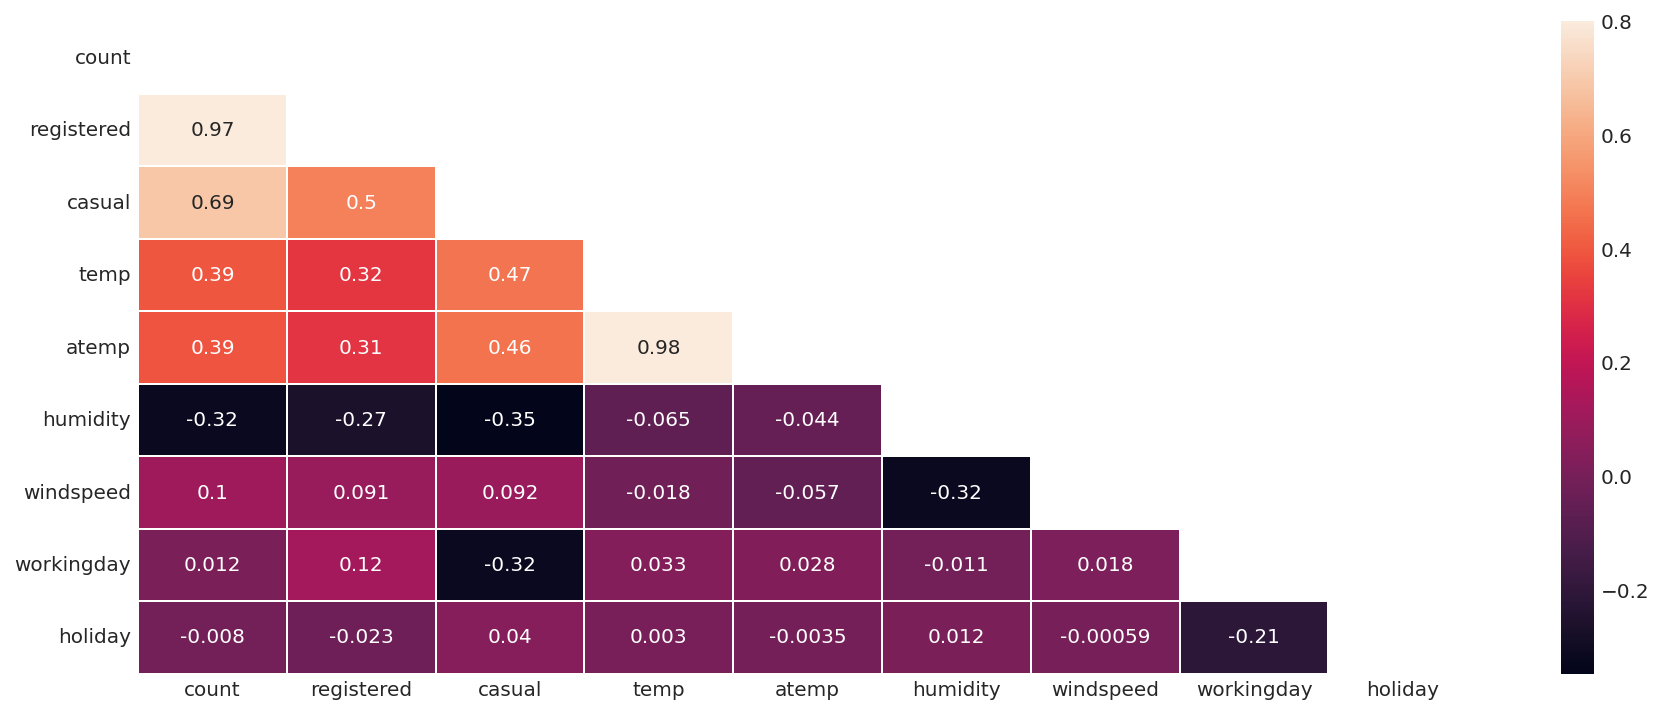

In [56]:
corrMatt = sub_df.corr()
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=False, annot=True, ax=ax, linewidths=1);

In [57]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
data = all_df[['data_set', 'season']].copy()
data['season'] = data['season'].map(lambda d : season_map[d])

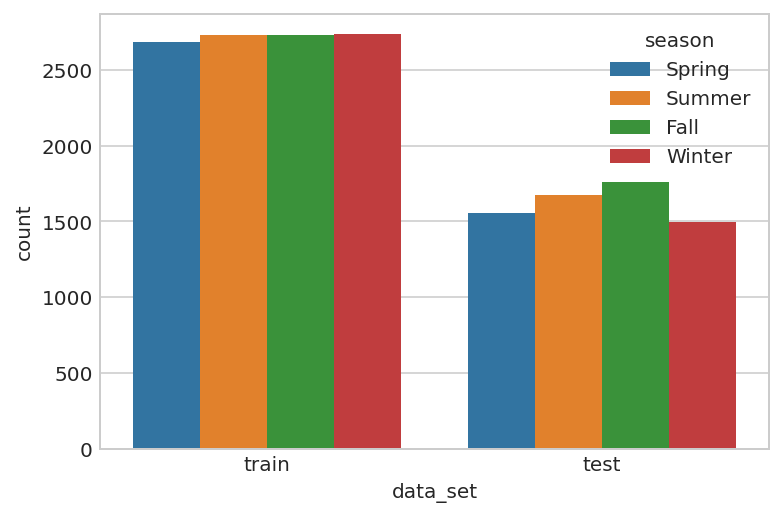

In [58]:
sns.countplot(x="data_set", hue="season", data=data);

In [59]:
weather_map = {1:'Good', 2:'Normal', 3:'Bad', 4:'Worse'}
data = all_df[['data_set', 'weather']].copy()
data['weather'] = data['weather'].map(lambda d : weather_map[d])

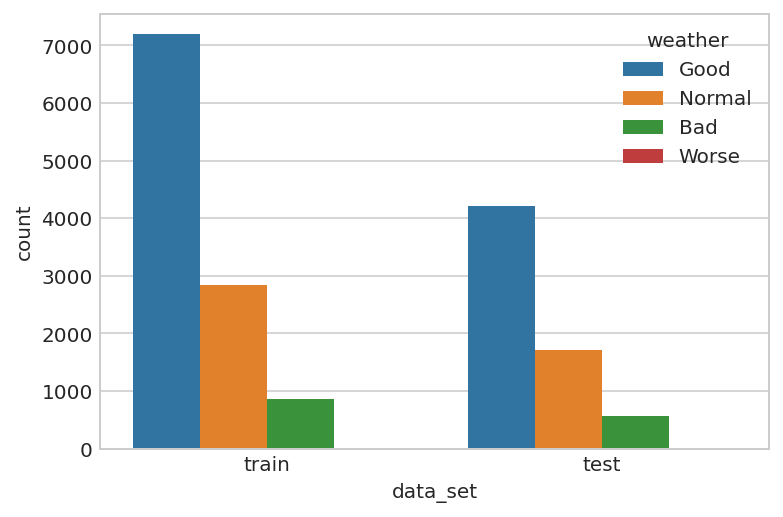

In [60]:
sns.countplot(x="data_set", hue="weather", data=data);


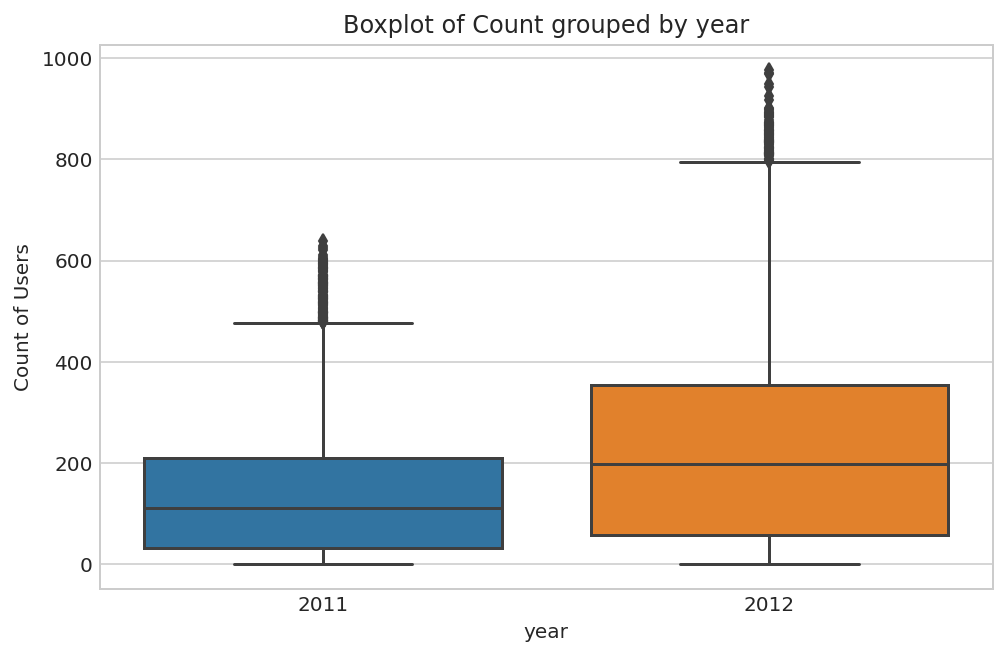

In [61]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='year', y='count', data=train_df)
plt.ylabel('Count of Users')
plt.title("Boxplot of Count grouped by year");

In [62]:
# feature engineer a new column whether its a peak hour or not
all_df['peak'] = all_df[['hour', 'workingday']]\
    .apply(lambda df: 1 if ((df['workingday'] == 1 and (df['hour'] == 8 or 17 <= df['hour'] <= 18)) \
                            or (df['workingday'] == 0 and 10 <= df['workingday'] <= 19)) else 0, axis = 1)

In [63]:
# sandy
all_df['holiday'] = all_df[['month', 'day', 'holiday', 'year']]\
    .apply(lambda df: 1 if (df['year'] == 2012 and df['month'] == 10 and df['day'] == 30) else 0, axis = 1)

# christmas and others
all_df['holiday'] = all_df[['month', 'day', 'holiday']]\
    .apply(lambda df: 1 if (df['month'] == 12 and df['day'] in [24, 26, 31]) else df['holiday'], axis = 1)
all_df['workingday'] = all_df[['month', 'day', 'workingday']]\
    .apply(lambda df: 0 if df['month'] == 12 and df['day'] in [24, 31] else df['workingday'], axis = 1)

In [64]:
# from histogram
all_df['ideal'] = all_df[['temp', 'windspeed']]\
    .apply(lambda df: 1 if (df['temp'] > 27 and df['windspeed'] < 30) else 0, axis = 1)
    
all_df['sticky'] = all_df[['humidity', 'workingday']]\
    .apply(lambda df: 1 if (df['workingday'] == 1 and df['humidity'] >= 60) else 0, axis = 1)

In [65]:
all_df.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set,casual_log,registered_log,count_log,date,day,month,year,hour,dow,woy,count_season,peak,ideal,sticky
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-06-12 03:00:00,2012-06-12 03:00:00,2,0,1,2,27.06,31.060,69,16.9979,3,9,12,train,1.386294,2.302585,2.564949,2012-06-12,12,6,2012,3,1,24,588282,0,1,1
2012-06-14 07:00:00,2012-06-14 07:00:00,2,0,1,1,24.60,30.305,60,19.0012,26,480,506,train,3.295837,6.175867,6.228511,2012-06-14,14,6,2012,7,3,24,588282,0,0,1
2012-09-08 18:00:00,2012-09-08 18:00:00,3,0,0,3,23.78,27.275,83,8.9981,27,140,167,train,3.332205,4.948760,5.123964,2012-09-08,8,9,2012,18,5,36,640662,0,0,0
2012-06-21 16:00:00,2012-06-21 16:00:00,3,0,1,1,36.90,40.910,35,8.9981,0,0,0,test,0.000000,0.000000,0.000000,2012-06-21,21,6,2012,16,3,25,640662,0,1,0
2011-10-07 11:00:00,2011-10-07 11:00:00,4,0,1,1,22.96,26.515,63,0.0000,80,150,230,train,4.394449,5.017280,5.442418,2011-10-07,7,10,2011,11,4,40,544034,0,0,1
2012-08-12 06:00:00,2012-08-12 06:00:00,3,0,0,1,26.24,30.305,65,11.0014,2,14,16,train,1.098612,2.708050,2.833213,2012-08-12,12,8,2012,6,6,32,640662,0,0,0
2011-11-25 07:00:00,2011-11-25 07:00:00,4,0,0,1,10.66,15.150,81,0.0000,0,0,0,test,0.000000,0.000000,0.000000,2011-11-25,25,11,2011,7,4,47,544034,0,0,0
2011-02-14 22:00:00,2011-02-14 22:00:00,1,0,1,1,13.94,14.395,46,43.9989,1,44,45,train,0.693147,3.806662,3.828641,2011-02-14,14,2,2011,22,0,7,312498,0,0,0
2012-07-08 17:00:00,2012-07-08 17:00:00,3,0,0,1,31.98,37.120,59,0.0000,68,202,270,train,4.234107,5.313206,5.602119,2012-07-08,8,7,2012,17,6,27,640662,0,1,0


In [66]:
# instead of randomly splitting our training data 
# for cross validation, let's construct a framework that's more
# in line with how the data is divvied up for this competition
# (given first 19 days of each month, what is demand for remaining days)
# so, let's split our training data into 2 time contiguous datasets
# for fitting and validating our model (days 1-14 vs. days 15-19).

# also, since submissions are evaluated based on the
# root mean squared logarithmic error (RMSLE), let's replicate
# that computation as we test and tune our model.

train_df = all_df[all_df['data_set'] == 'train']
test_df = all_df[all_df['data_set'] == 'test']

def get_rmsle(y_pred, y_actual):
    diff = np.log(y_pred + 1) - np.log(y_actual + 1)
    mean_error = np.square(diff).mean()
    return np.sqrt(mean_error)

def custom_train_valid_split(data, cutoff_day=15):
    train = data[data['day'] <= cutoff_day]
    valid = data[data['day'] > cutoff_day]

    return train, valid

def prep_train_data(data, input_cols):
    X = data[input_cols].values
    y_r = data['registered_log'].values
    y_c = data['casual_log'].values

    return X, y_r, y_c

# predict on validation set & transform output back from log scale
def predict_on_validation_set(model, input_cols):
    
    train, valid = custom_train_valid_split(train_df)

    # prepare training & validation set
    X_train, y_train_r, y_train_c = prep_train_data(train, input_cols)
    X_valid, y_valid_r, y_valid_c = prep_train_data(valid, input_cols)

    model_r = model.fit(X_train, y_train_r)
    y_pred_r = np.exp(model_r.predict(X_valid)) - 1

    model_c = model.fit(X_train, y_train_c)
    y_pred_c = np.exp(model_c.predict(X_valid)) - 1

    y_pred_comb = np.round(y_pred_r + y_pred_c)
    y_pred_comb[y_pred_comb < 0] = 0

    y_actual_comb = np.exp(y_valid_r) + np.exp(y_valid_c) - 2

    rmsle = get_rmsle(y_pred_comb, y_actual_comb)
    return (y_pred_comb, y_actual_comb, rmsle)


# predict on test set & transform output back from log scale
def predict_on_test_set(model, input_cols):
    
    # prepare training set
    X_train, y_train_r, y_train_c = prep_train_data(train_df, input_cols)

    # prepare testing set
    X_test = test_df[input_cols].values
    
    model_c = model.fit(X_train, y_train_c)
    y_pred_c = np.exp(model_c.predict(X_test)) - 1

    model_r = model.fit(X_train, y_train_r)
    y_pred_r = np.exp(model_r.predict(X_test)) - 1
    
    # add casual & registered predictions together
    y_pred_comb = np.round(y_pred_r + y_pred_c)
    y_pred_comb[y_pred_comb < 0] = 0
    
    return y_pred_comb

In [67]:
params = {'n_estimators': 1000, 'max_depth': 15, 'random_state': 0, 'min_samples_split' : 5, 'n_jobs': -1}
rf_model = RandomForestRegressor(**params)
rf_cols = [
    'weather', 'temp', 'atemp', 'windspeed',
    'workingday', 'season', 'holiday', 'sticky',
    'hour', 'dow', 'woy', 'peak'
    ]

(rf_pred, rf_actual, rf_rmsle) = predict_on_validation_set(rf_model, rf_cols)

In [68]:
print(rf_rmsle)

0.4347532320115729


In [69]:
all_df[rf_cols].corr()

,weather,temp,atemp,windspeed,workingday,season,holiday,sticky,hour,dow,woy,peak
weather,1.000000,-0.102640,-0.105563,0.026226,0.042061,-0.014524,0.038472,0.243523,-0.020203,-0.046424,0.009692,0.013506
temp,-0.102640,1.000000,0.987672,-0.023125,0.069153,0.312025,-0.101406,-0.007074,0.137603,-0.036220,0.198641,0.044723
atemp,-0.105563,0.987672,1.000000,-0.062336,0.067594,0.319380,-0.101800,0.004717,0.133750,-0.038918,0.205561,0.042167
windspeed,0.026226,-0.023125,-0.062336,1.000000,-0.001937,-0.149773,0.008593,-0.187671,0.137252,0.003274,-0.131613,0.054581
workingday,0.042061,0.069153,0.067594,-0.001937,1.000000,0.010879,-0.091171,0.536900,0.002185,-0.698028,-0.025700,0.207653
season,-0.014524,0.312025,0.319380,-0.149773,0.010879,1.000000,-0.109490,0.095556,-0.006117,-0.007448,0.814302,-0.001289
holiday,0.038472,-0.101406,-0.101800,0.008593,-0.091171,-0.109490,1.000000,-0.029345,0.007158,-0.049770,0.104596,-0.004713
sticky,0.243523,-0.007074,0.004717,-0.187671,0.536900,0.095556,-0.029345,1.000000,-0.186289,-0.399949,0.096672,0.050274
hour,-0.020203,0.137603,0.133750,0.137252,0.002185,-0.006117,0.007158,-0.186289,1.000000,-0.002893,-0.005437,0.124008
dow,-0.046424,-0.036220,-0.038918,0.003274,-0.698028,-0.007448,-0.049770,-0.399949,-0.002893,1.000000,0.009368,-0.148325


In [70]:
params = {'n_estimators': 150, 'max_depth': 5, 'random_state': 0, 'min_samples_leaf' : 10, 'learning_rate': 0.1, 'subsample': 0.7, 'loss': 'ls'}
gbm_model = GradientBoostingRegressor(**params)
gbm_cols = [
    'weather', 'temp', 'atemp', 'humidity', 'windspeed',
    'holiday', 'workingday', 'season',
    'hour', 'dow', 'year', 'ideal', 'count_season',
]

(gbm_pred, gbm_actual, gbm_rmsle) = predict_on_validation_set(gbm_model, gbm_cols)

In [71]:
print(gbm_rmsle)

0.31194148349765005


In [72]:
all_df[gbm_cols].corr()

,weather,temp,atemp,humidity,windspeed,holiday,workingday,season,hour,dow,year,ideal,count_season
weather,1.000000,-0.102640,-0.105563,0.418130,0.026226,0.038472,0.042061,-0.014524,-0.020203,-0.046424,-0.019157,-0.145407,-0.051863
temp,-0.102640,1.000000,0.987672,-0.069881,-0.023125,-0.101406,0.069153,0.312025,0.137603,-0.036220,0.040913,0.727266,0.705172
atemp,-0.105563,0.987672,1.000000,-0.051918,-0.062336,-0.101800,0.067594,0.319380,0.133750,-0.038918,0.039222,0.701874,0.701434
humidity,0.418130,-0.069881,-0.051918,1.000000,-0.290105,0.014029,0.014316,0.150625,-0.276498,-0.035233,-0.083546,-0.141678,0.113724
windspeed,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.008593,-0.001937,-0.149773,0.137252,0.003274,-0.008740,-0.051489,-0.113048
holiday,0.038472,-0.101406,-0.101800,0.014029,0.008593,1.000000,-0.091171,-0.109490,0.007158,-0.049770,0.006293,-0.054138,-0.146902
workingday,0.042061,0.069153,0.067594,0.014316,-0.001937,-0.091171,1.000000,0.010879,0.002185,-0.698028,-0.007959,0.023068,0.044535
season,-0.014524,0.312025,0.319380,0.150625,-0.149773,-0.109490,0.010879,1.000000,-0.006117,-0.007448,-0.010742,0.156455,0.663537
hour,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.007158,0.002185,-0.006117,1.000000,-0.002893,-0.003867,0.113745,-0.008248
dow,-0.046424,-0.036220,-0.038918,-0.035233,0.003274,-0.049770,-0.698028,-0.007448,-0.002893,1.000000,0.000977,-0.009208,-0.014472


In [73]:
# the blend gives a better score on the leaderboard, even though it does not on the validation set
y_pred = np.round(.2*rf_pred + .8*gbm_pred)
print(get_rmsle(y_pred, rf_actual))

0.3155999345815696


In [74]:
rf_pred = predict_on_test_set(rf_model, rf_cols)
gbm_pred = predict_on_test_set(gbm_model, gbm_cols)

y_pred = np.round(.2*rf_pred + .8*gbm_pred)

In [75]:
# output predictions for submission
submit_manual_blend_df = test_df[['datetime', 'count']].copy()
submit_manual_blend_df['count'] = y_pred

In [76]:
submit_manual_blend_df.head(5)

,datetime,count
datetime,,
2011-01-20 00:00:00,2011-01-20 00:00:00,13.0
2011-01-20 01:00:00,2011-01-20 01:00:00,5.0
2011-01-20 02:00:00,2011-01-20 02:00:00,3.0
2011-01-20 03:00:00,2011-01-20 03:00:00,2.0
2011-01-20 04:00:00,2011-01-20 04:00:00,2.0


In [78]:
submit_manual_blend_df.to_csv('output/submit_manual_blend.csv', index=False)

In [79]:
# Level 0 RandomForestRegressor
rf_params = {'n_estimators': 1000, 'max_depth': 15, 'random_state': 0, 'min_samples_split' : 5, 'n_jobs': -1}
rf_model = RandomForestRegressor(**rf_params)
rf_cols = [
    'weather', 'temp', 'atemp', 'windspeed',
    'workingday', 'season', 'holiday', 'sticky',
    'hour', 'dow', 'woy', 'peak'
    ]

In [80]:
# Level 0 GradientBoostingRegressor
gbm_params = {'n_estimators': 150, 'max_depth': 5, 'random_state': 0, 'min_samples_leaf' : 10, 'learning_rate': 0.1, 'subsample': 0.7, 'loss': 'ls'}
gbm_model = GradientBoostingRegressor(**gbm_params)
gbm_cols = [
    'weather', 'temp', 'atemp', 'humidity', 'windspeed',
    'holiday', 'workingday', 'season',
    'hour', 'dow', 'year', 'ideal', 'count_season',
]

In [81]:
clf_input_cols = [rf_cols, gbm_cols]
clfs = [rf_model, gbm_model]

In [82]:
# Create train and test sets for blending and Pre-allocate the data
blend_train = np.zeros((train_df.shape[0], len(clfs)))
blend_test = np.zeros((test_df.shape[0], len(clfs)))

In [83]:
# For each classifier, we train the classifier with its corresponding input_cols 
# and record the predictions on the train and the test set
for clf_index, (input_cols, clf) in enumerate(zip(clf_input_cols, clfs)):
    
    # prepare training and validation set
    X_train, y_train_r, y_train_c = prep_train_data(train_df, input_cols)
    
    # prepare testing set
    X_test = test_df[input_cols].values
    
    model_r = clf.fit(X_train, y_train_r)
    y_pred_train_r = np.exp(model_r.predict(X_train)) - 1
    y_pred_test_r = np.exp(model_r.predict(X_test)) - 1

    model_c = clf.fit(X_train, y_train_c)
    y_pred_train_c = np.exp(model_c.predict(X_train)) - 1
    y_pred_test_c = np.exp(model_c.predict(X_test)) - 1

    y_pred_train_comb = np.round(y_pred_train_r + y_pred_train_c)
    y_pred_train_comb[y_pred_train_comb < 0] = 0
    
    y_pred_test_comb = np.round(y_pred_test_r + y_pred_test_c)
    y_pred_test_comb[y_pred_test_comb < 0] = 0
    
    blend_train[:, clf_index] = y_pred_train_comb
    blend_test[:, clf_index] = y_pred_test_comb

In [84]:
# Level 1 Belending Classifier using LinearRegression
from sklearn.linear_model import LinearRegression
bclf = LinearRegression(fit_intercept=False)
bclf.fit(blend_train, train_df['count'])

LinearRegression(fit_intercept=False)

In [85]:
# What is the weighted combination of the base classifiers?
bclf.coef_

array([0.31439992, 0.72958009])

In [86]:
# Stacked and Blending predictions
y_pred_blend = np.round(bclf.predict(blend_test))

In [87]:
# R^2 score
bclf.score(blend_train, train_df['count'])

0.9655050796297145

In [88]:
# output predictions for submission
submit_stack_blend_df = test_df[['datetime', 'count']].copy()
submit_stack_blend_df['count'] = y_pred_blend

In [89]:
submit_stack_blend_df.head(5)

,datetime,count
datetime,,
2011-01-20 00:00:00,2011-01-20 00:00:00,13.0
2011-01-20 01:00:00,2011-01-20 01:00:00,6.0
2011-01-20 02:00:00,2011-01-20 02:00:00,3.0
2011-01-20 03:00:00,2011-01-20 03:00:00,2.0
2011-01-20 04:00:00,2011-01-20 04:00:00,2.0


In [90]:
submit_stack_blend_df.to_csv('output/submit_stack_blend.csv', index=False)